# Study on the Expenditure and Development Level of Education and Scientific Research Funds in Prefecture-level Cities in China
201708227 FANG ZIXIN


As we all know, China is a vibrant developing country, with its overall economic size now ranking second in the world, only behind the United States. Economic development cannot be achieved without the impetus of science and technology, and scientific progress is inseparable from investment in education. This study utilizes data from the "Scientific Research Budget of Prefecture-level Cities in China" published by the Chinese Academy of Sciences and tables created from the educational expenditure reports of various cities within each province released by the provincial education departments. These data are further analyzed in terms of both time and space.

## Data Compilation and Inspection

In this study, there are two table files from different data sources, namely education.csv and science.csv.

The education.csv file contains data on the general local public expenditure (in ten thousand yuan), education funds (in ten thousand yuan), and education level (specific indicators) of 297 prefecture-level cities in China from 2003 to 2021. 

The science.csv file contains data on the general local public expenditure (in ten thousand yuan), science and technology funds (in ten thousand yuan), and science and technology level (specific indicators) of 297 prefecture-level cities in China from 2003 to 2021.

### Importing Python Libraries and Reading Data

In [14]:
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
import pyproj
import contextily as ctx
import seaborn as sns

import geoplot as gplt
import geoplot.crs as gcrs

education_df = pd.read_csv('education.csv')  # Reading the education data from a CSV file into a DataFrame
science_df = pd.read_csv('science.csv')  # Reading the science data from a CSV file into a DataFrame

print("Education DataFrame Columns:", education_df.columns.tolist())  # Printing the column names of the education DataFrame
print("Science DataFrame Columns:", science_df.columns.tolist())  # Printing the column names of the science DataFrame



Cannot find header.dxf (GDAL_DATA is not defined)


Education DataFrame Columns: ['prefecture-level city', 'Prefecture level city code', 'year', 'province', 'Local general public budget expenditures_Ten thousand yuan_Citywide', 'Education expenditure_Ten thousand yuan_Citywide', 'education level spending']
Science DataFrame Columns: ['prefecture-level city', 'Prefecture level city code', 'year', 'Local general public budget expenditures_Ten thousand yuan_Citywide', 'science and technology expenditure_Ten thousand yuan_Citywide', 'Scientific and technological level']


In [7]:
# Get the information of the education_df
print("Education DataFrame Info:")  # Print a header for the education DataFrame info
print(education_df.info())  # Print the summary information of the education DataFrame

# Get the information of the science_df
print("\nScience DataFrame Info:")  # Print a header for the science DataFrame info
print(science_df.info())  # Print the summary information of the science DataFrame


Education DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5509 entries, 0 to 5508
Data columns (total 7 columns):
 #   Column                                                               Non-Null Count  Dtype  
---  ------                                                               --------------  -----  
 0   prefecture-level city                                                5509 non-null   object 
 1   Prefecture level city code                                           5509 non-null   int64  
 2   year                                                                 5509 non-null   int64  
 3   province                                                             5509 non-null   object 
 4   Local general public budget expenditures_Ten thousand yuan_Citywide  5509 non-null   int64  
 5   Education expenditure_Ten thousand yuan_Citywide                     5509 non-null   int64  
 6   education level spending                                             5509 non-n

Data reading is complete. Next, we will proceed with data compilation and inspection. We will check the data for the year 2010 (subsequent analyses will consistently select data from different years for comparison or compare data from different years within the same region).

In [2]:
education_df_2010 = education_df[education_df['year'] == 2010]  # Filtering the education DataFrame for the year 2010
science_df_2010 = science_df[science_df['year'] == 2010]  # Filtering the science DataFrame for the year 2010

# Displaying the first five rows of each column
print("\nEducation DataFrame First 5 Rows (Year 2010):")  # Printing a header for the education DataFrame output
print(education_df_2010.head(10))  # Displaying the first 10 rows of the filtered education DataFrame

print("\nScience DataFrame First 5 Rows (Year 2010):")  # Printing a header for the science DataFrame output
print(science_df_2010.head(10))  # Displaying the first 10 rows of the filtered science DataFrame


Education DataFrame First 5 Rows (Year 2010):
    prefecture-level city  Prefecture level city code  year        province  \
7                 Beijing                      110000  2010         Beijing   
26           Tianjin City                      120000  2010    Tianjin City   
45      Shijiazhuang City                      130100  2010  Hebei Province   
64          Tangshan City                      130200  2010  Hebei Province   
83       Qinhuangdao City                      130300  2010  Hebei Province   
102                Handan                      130400  2010  Hebei Province   
121          Xingtai city                      130500  2010  Hebei Province   
140          Baoding City                      130600  2010  Hebei Province   
159      Zhangjiakou City                      130700  2010  Hebei Province   
178          Chengde City                      130800  2010  Hebei Province   

     Local general public budget expenditures_Ten thousand yuan_Citywide  \
7      

### Data Inspection and Correction

To ensure the accuracy of the data in both tables, we first check the overall data volume. By counting the number of rows in each table, we can see that the science table has one additional row. This indicates that further processing of the table data is needed.

In [3]:
education_count = len(education_df)  # Counting the number of rows in the education DataFrame
science_count = len(science_df)  # Counting the number of rows in the science DataFrame
total_count = education_count + science_count  # Calculating the total number of rows in both DataFrames

print(f"\nTotal number of rows in Education DataFrame: {education_count}")  # Printing the total number of rows in the education DataFrame
print(f"Total number of rows in Science DataFrame: {science_count}")  # Printing the total number of rows in the science DataFrame
print(f"Total number of rows in both DataFrames: {total_count}")  # Printing the combined total number of rows in both DataFrames



Total number of rows in Education DataFrame: 5509
Total number of rows in Science DataFrame: 5509
Total number of rows in both DataFrames: 11018


For further analysis, we need some data cleaning steps. We will combine the 'prefecture-level city' and 'year' columns to create a unique identifier. By comparing the data from both tables, we can quickly identify mismatched and unique data. Removing the unique data will complete the data cleaning process.

In [4]:
# Combine 'prefecture-level city' and 'year' columns to create a unique identifier
education_keys = education_df[['prefecture-level city', 'year']].astype(str).agg('-'.join, axis=1)  # Create unique keys for education DataFrame
science_keys = science_df[['prefecture-level city', 'year']].astype(str).agg('-'.join, axis=1)  # Create unique keys for science DataFrame

# Find unique entries in education_df
unique_education_keys = education_keys[~education_keys.isin(science_keys)]  # Identify keys in education DataFrame that are not in science DataFrame
unique_education_entries = education_df[education_keys.isin(unique_education_keys)]  # Get the unique entries from education DataFrame

# Find unique entries in science_df
unique_science_keys = science_keys[~science_keys.isin(education_keys)]  # Identify keys in science DataFrame that are not in education DataFrame
unique_science_entries = science_df[science_keys.isin(unique_science_keys)]  # Get the unique entries from science DataFrame

print("Unique entries in Education DataFrame:")  # Print a header for unique entries in education DataFrame
print(unique_education_entries)  # Print the unique entries in education DataFrame

print("\nUnique entries in Science DataFrame:")  # Print a header for unique entries in science DataFrame
print(unique_science_entries)  # Print the unique entries in science DataFrame



Unique entries in Education DataFrame:
Empty DataFrame
Columns: [prefecture-level city, Prefecture level city code, year, province, Local general public budget expenditures_Ten thousand yuan_Citywide, Education expenditure_Ten thousand yuan_Citywide, education level spending]
Index: []

Unique entries in Science DataFrame:
Empty DataFrame
Columns: [prefecture-level city, Prefecture level city code, year, Local general public budget expenditures_Ten thousand yuan_Citywide, science and technology expenditure_Ten thousand yuan_Citywide, Scientific and technological level]
Index: []


In the initial run of the above code, I found a special value named "Liupanshui City" with the year value of 2013. The following code is used to delete this row from the table and save it again as the science table. Therefore, during the formal run, the error-checking part of the above code will show no errors because I have already corrected it by running the following code. For the original data, please refer to the science.xlsx file in the folder, not the modified science.csv.

In [ ]:
# Find the index of unique entries
unique_index = unique_science_entries.index  # Get the index of the unique entries in the science DataFrame

# Remove the unique entries from science_df
science_df = science_df.drop(index=unique_index)  # Drop the unique entries from the science DataFrame

# Save the updated DataFrame to a CSV file
science_df.to_csv('science.csv', index=False)  # Save the updated science DataFrame to 'science.csv' without the index

# Get the number of rows and columns in the updated DataFrame
rows, columns = science_df.shape  # Get the shape of the updated science DataFrame

print(f"Updated Science DataFrame has {rows} rows and {columns} columns.")  # Print the number of rows and columns in the updated science DataFrame



### Data Statistics and Presentation

In this section, we will explore the data. For example, I want to know the statistics regarding education expenditures in the education table. More details will be presented below.

In [5]:
# Calculate statistics for specified columns
education_stats = education_df[['Education expenditure_Ten thousand yuan_Citywide', 
                                'Local general public budget expenditures_Ten thousand yuan_Citywide']].describe()
# Calculate summary statistics for the specified columns in the education DataFrame

print(education_stats)  # Print the calculated statistics



       Education expenditure_Ten thousand yuan_Citywide  \
count                                      5.509000e+03   
mean                                       5.096257e+05   
std                                        8.127940e+05   
min                                        8.340000e+02   
25%                                        1.305140e+05   
50%                                        3.012750e+05   
75%                                        6.042300e+05   
max                                        1.147829e+07   

       Local general public budget expenditures_Ten thousand yuan_Citywide  
count                                       5.509000e+03                    
mean                                        3.001728e+06                    
std                                         5.480568e+06                    
min                                         3.305000e+04                    
25%                                         7.289280e+05                    
50%   

These statistics are crucial for the data analysis we need to conduct next. For example, China's administrative divisions are not always stable and have undergone many minor adjustments between 2003 and 2021. Therefore, when reading this data, we need to carefully analyze which data is valid and which data can be considered as outliers.

In [6]:
# Count the occurrences of each value in the 'year' column of education_df
education_year_counts = education_df['year'].value_counts().sort_index()
# Count and sort the occurrences of each year in the education DataFrame

# Count the occurrences of each value in the 'year' column of science_df
science_year_counts = science_df['year'].value_counts().sort_index()
# Count and sort the occurrences of each year in the science DataFrame

print("Year counts in Education DataFrame:")  # Print a header for the year counts in the education DataFrame
print(education_year_counts)  # Print the year counts for the education DataFrame

print("\nYear counts in Science DataFrame:")  # Print a header for the year counts in the science DataFrame
print(science_year_counts)  # Print the year counts for the science DataFrame



Year counts in Education DataFrame:
year
2003    283
2004    285
2005    286
2006    287
2007    287
2008    287
2009    287
2010    287
2011    288
2012    288
2013    288
2014    288
2015    290
2016    296
2017    297
2018    297
2019    296
2020    296
2021    296
Name: count, dtype: int64

Year counts in Science DataFrame:
year
2003    283
2004    285
2005    286
2006    287
2007    287
2008    287
2009    287
2010    287
2011    288
2012    288
2013    288
2014    288
2015    290
2016    296
2017    297
2018    297
2019    296
2020    296
2021    296
Name: count, dtype: int64


To further understand the data, we can read the unique values of the provinces where these prefecture-level cities are located. This will help us conduct multi-level analysis of the data's context and allow for localized analysis in the subsequent data examination.

In [10]:
# Get the unique values in the 'province' column of education_df
education_provinces = education_df['province'].unique()
# Retrieve the unique values from the 'province' column in the education DataFrame

print("Provinces in Education DataFrame:")  # Print a header for the unique provinces in the education DataFrame
print(education_provinces)  # Print the unique provinces in the education DataFrame


Provinces in Education DataFrame:
['Beijing' 'Tianjin City' 'Hebei Province' 'Shanxi Province'
 'Inner Mongolia Autonomous Region' 'Liaoning Province' 'Jilin Province'
 'Heilongjiang Province' 'Shanghai' 'Jiangsu Province' 'Zhejiang Province'
 'Anhui Province' 'Fujian Province' 'Jiangxi Province' 'Shandong Province'
 'Henan Province' 'hubei province' 'Hunan Province' 'Guangdong Province'
 'Guangxi Zhuang Autonomous Region' 'Hainan' 'Chongqing'
 'Sichuan Province' 'Guizhou Province' 'Yunnan Province'
 'Tibet Autonomous Region' 'Shaanxi Province' 'Gansu province'
 'Qinghai Province' 'Ningxia Hui Autonomous Region'
 'Xinjiang Uygur Autonomous Region']


## Data Tabulation and Visualization

Let's start with a relatively simple data analysis. Using the education data, we will calculate the total annual education expenditure for each province and create a set of bar charts. From these charts, we can clearly see that in recent years, the education expenditure in all provinces of China has significantly increased. This reflects the continuous expansion of investment in education by provincial education departments and the increasing emphasis on education by provincial governments, resulting in larger budgets.

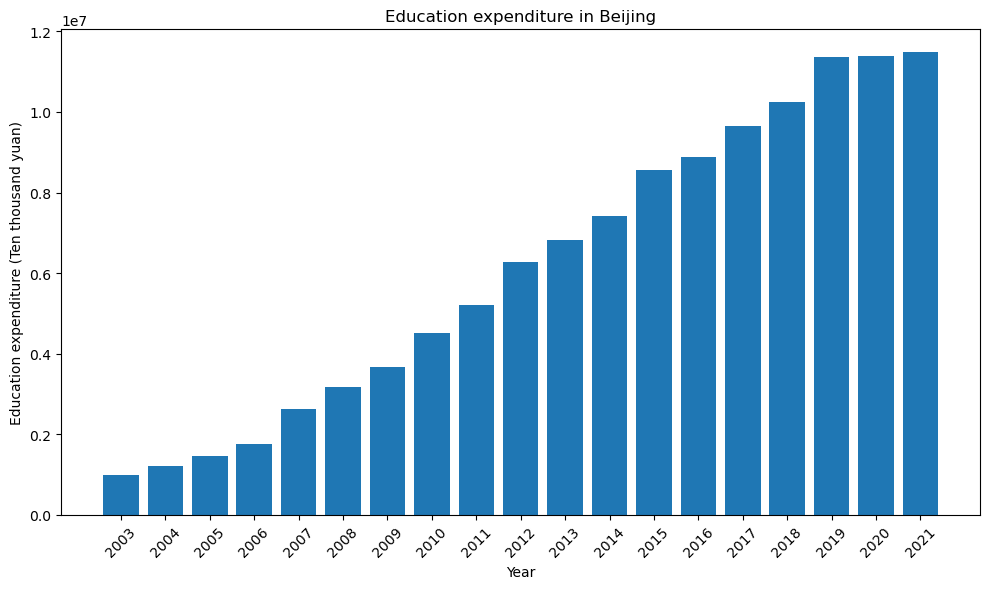

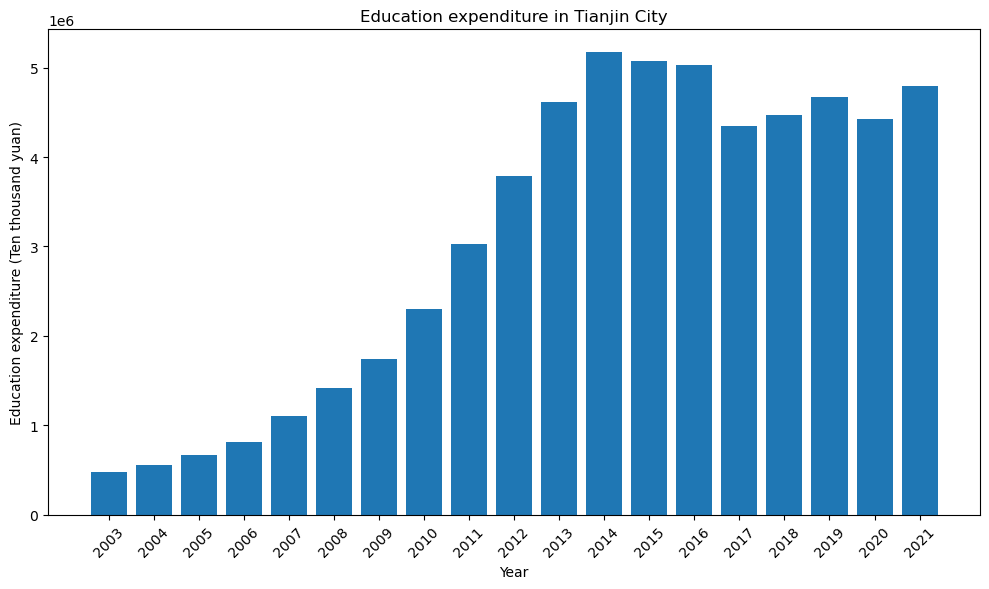

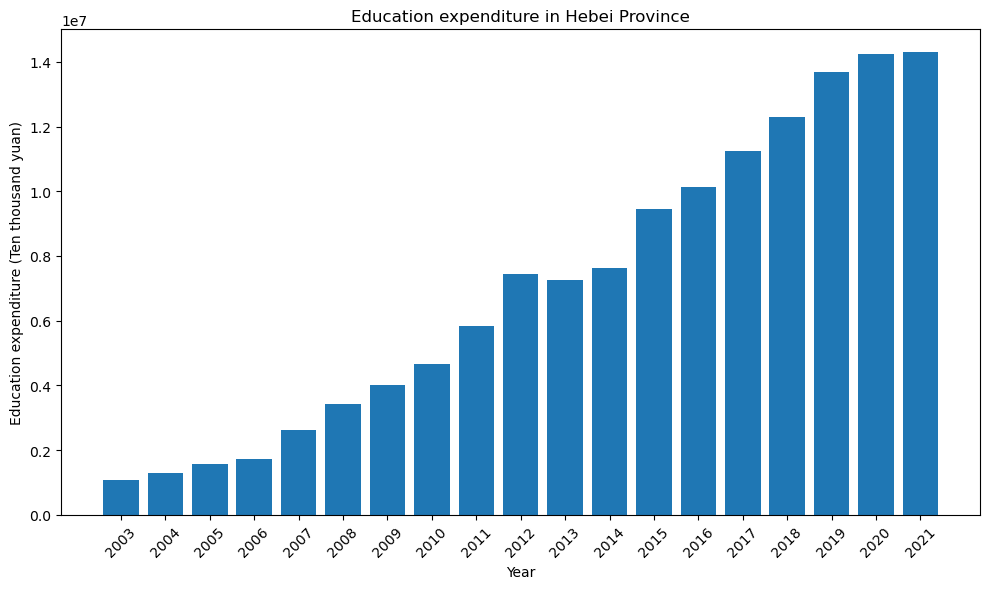

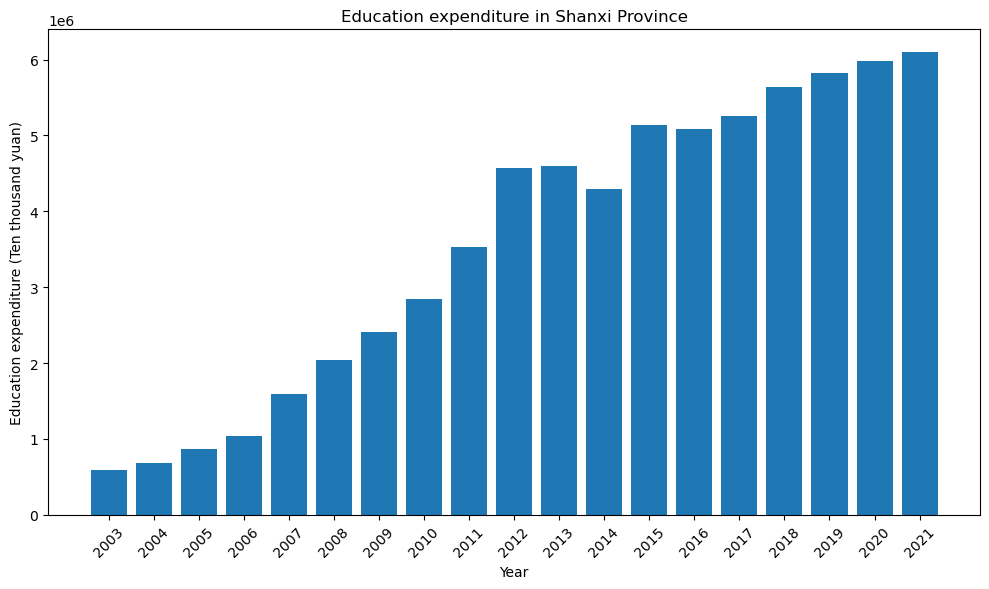

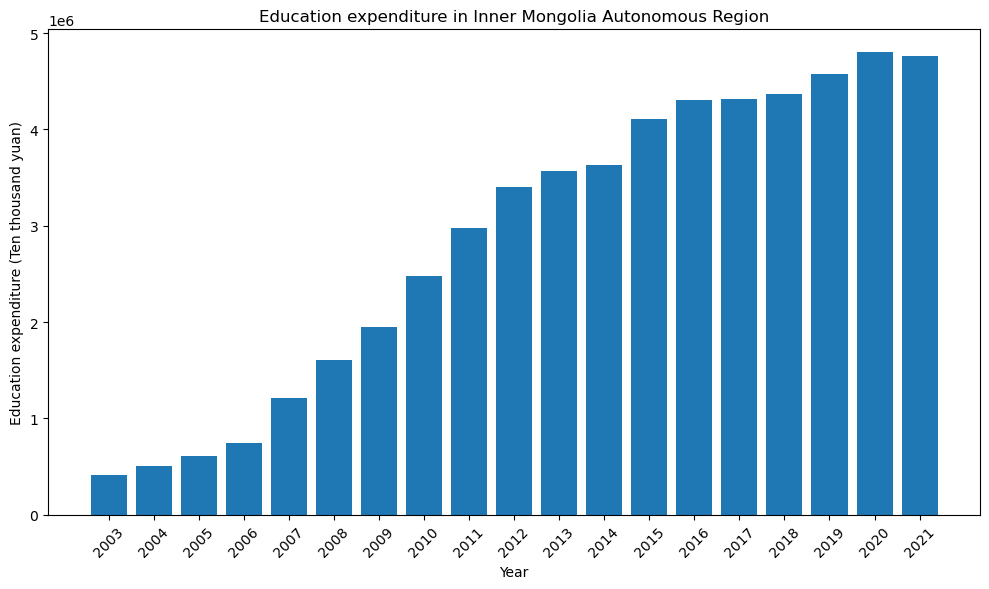

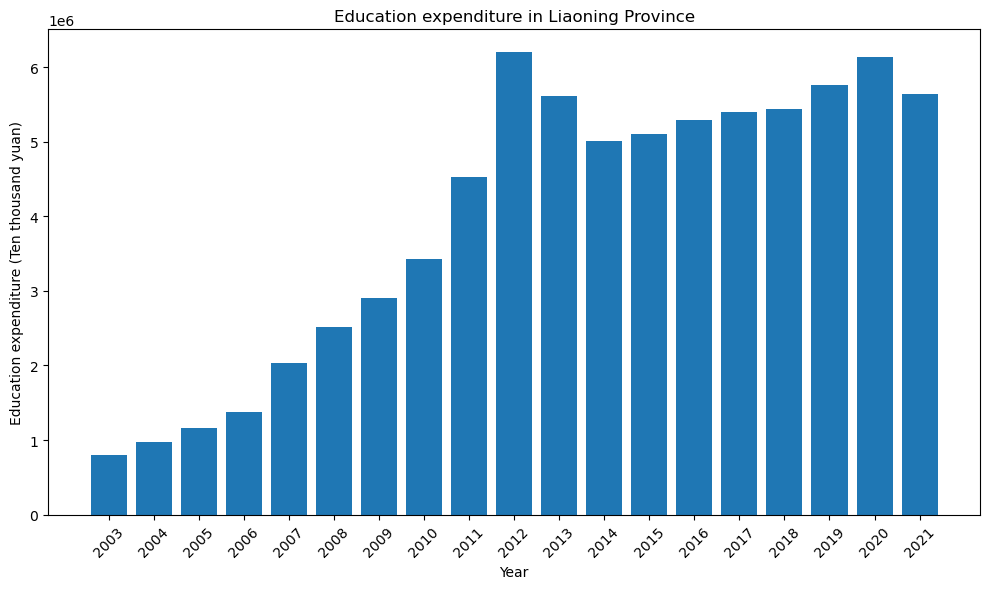

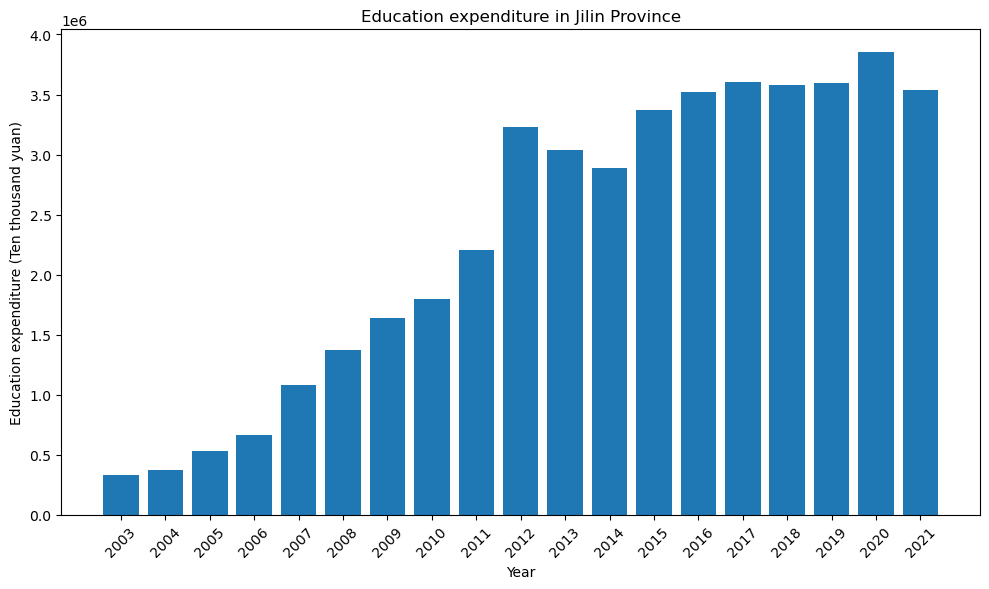

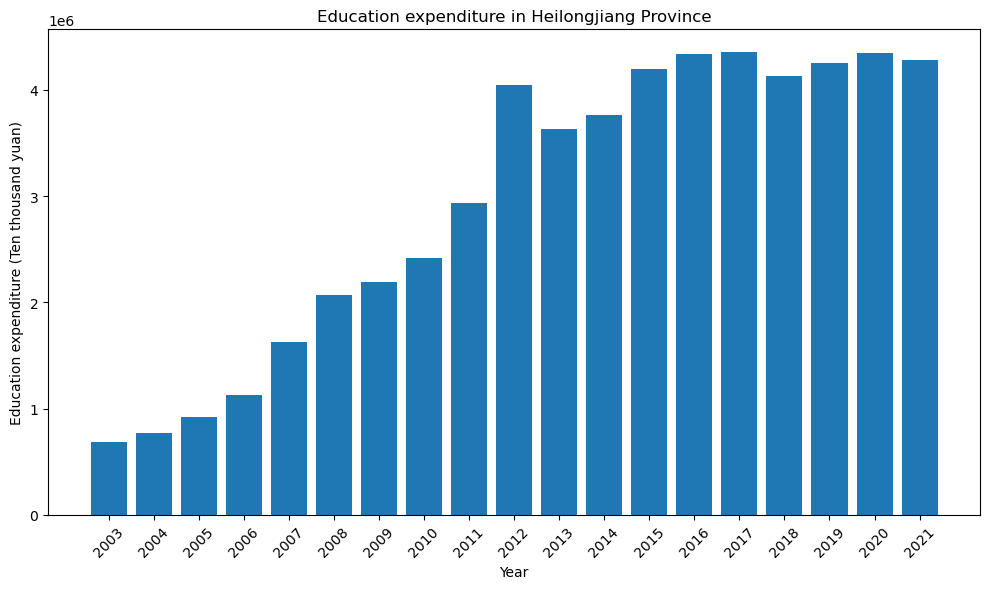

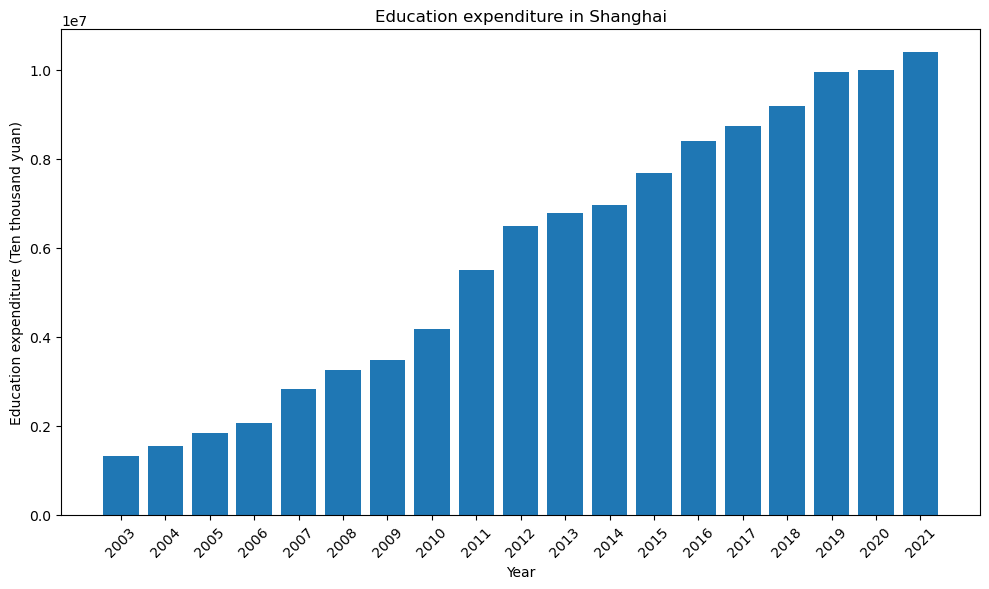

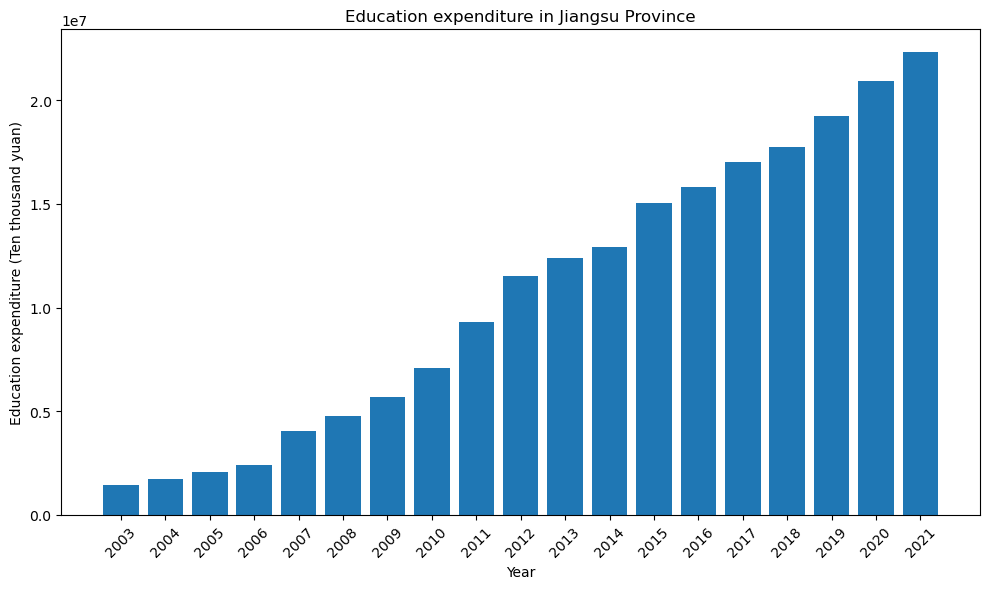

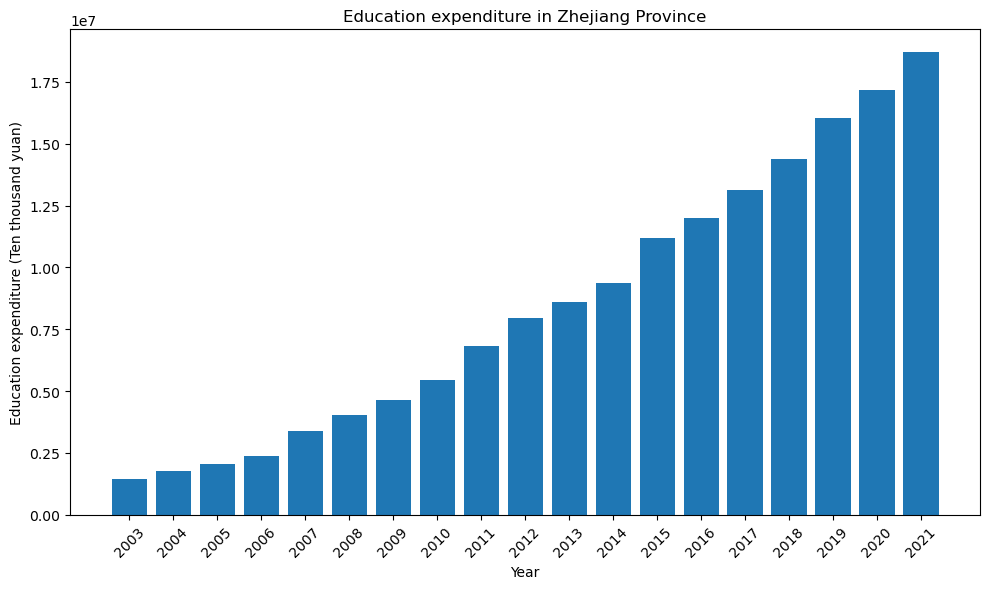

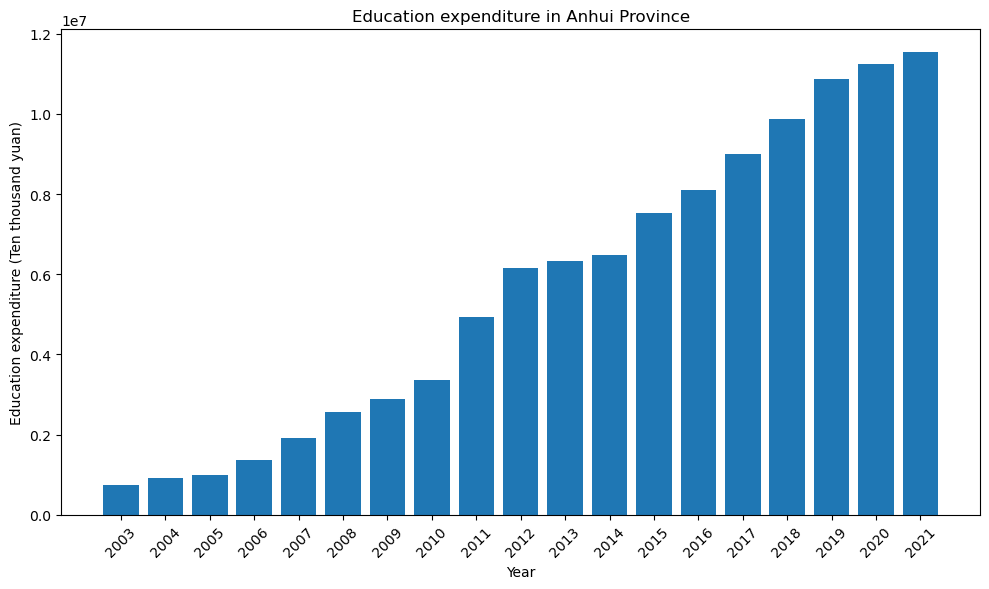

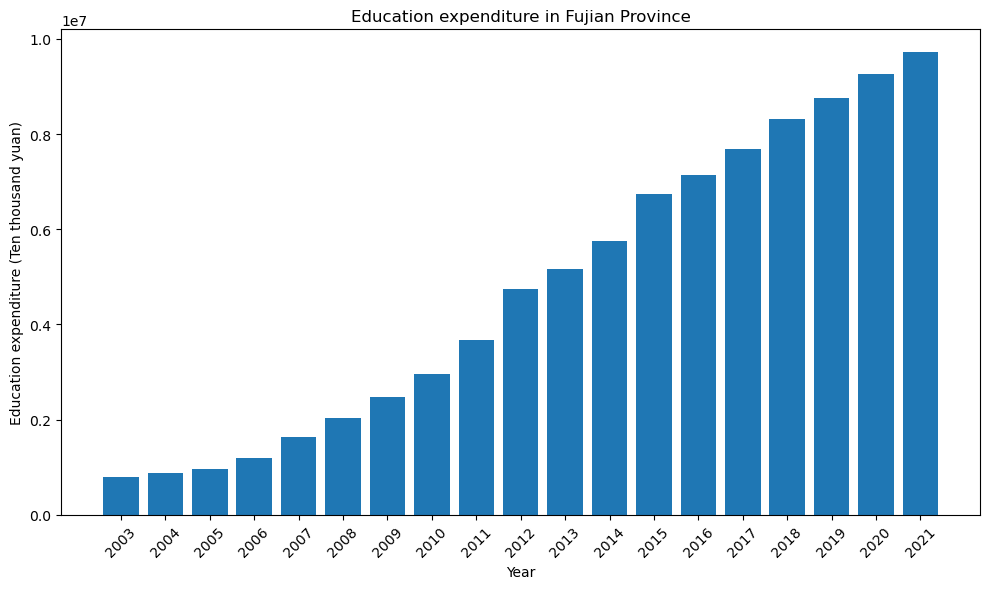

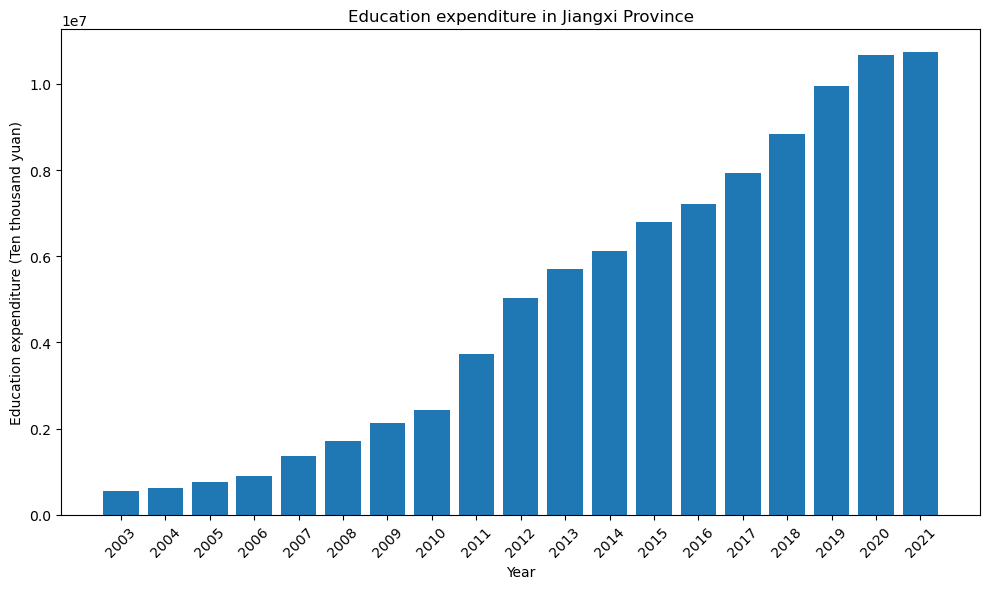

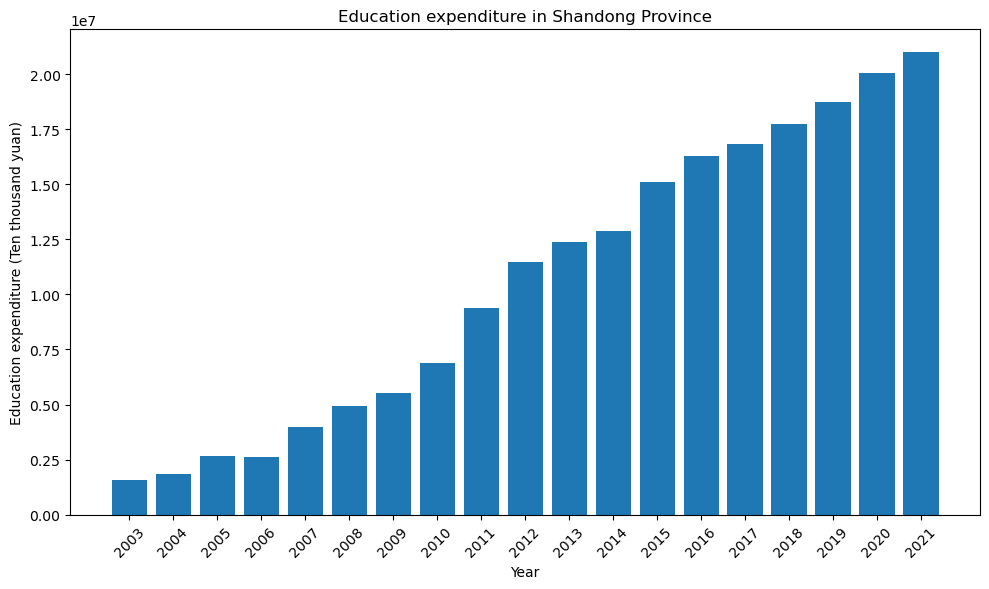

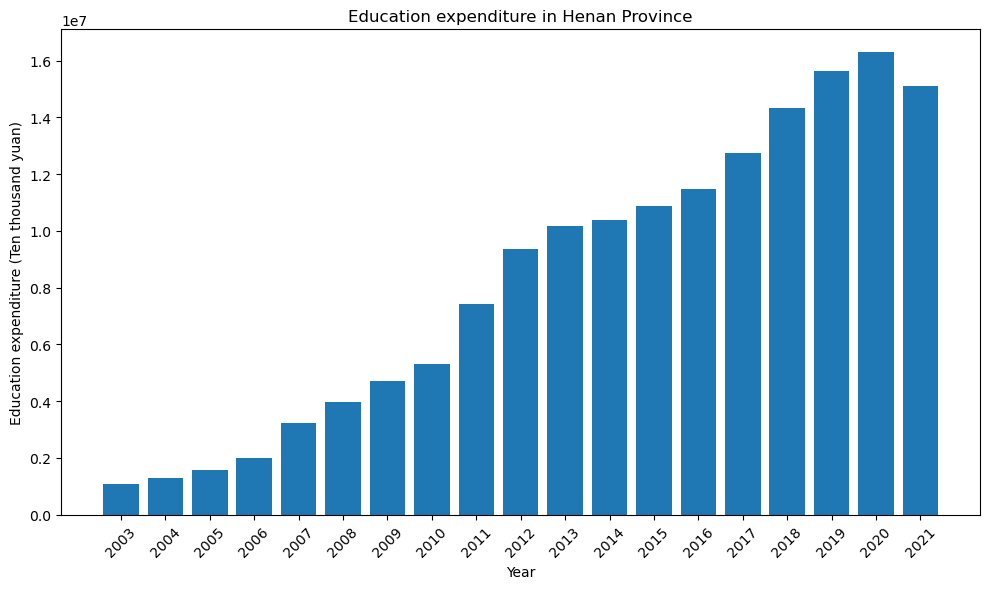

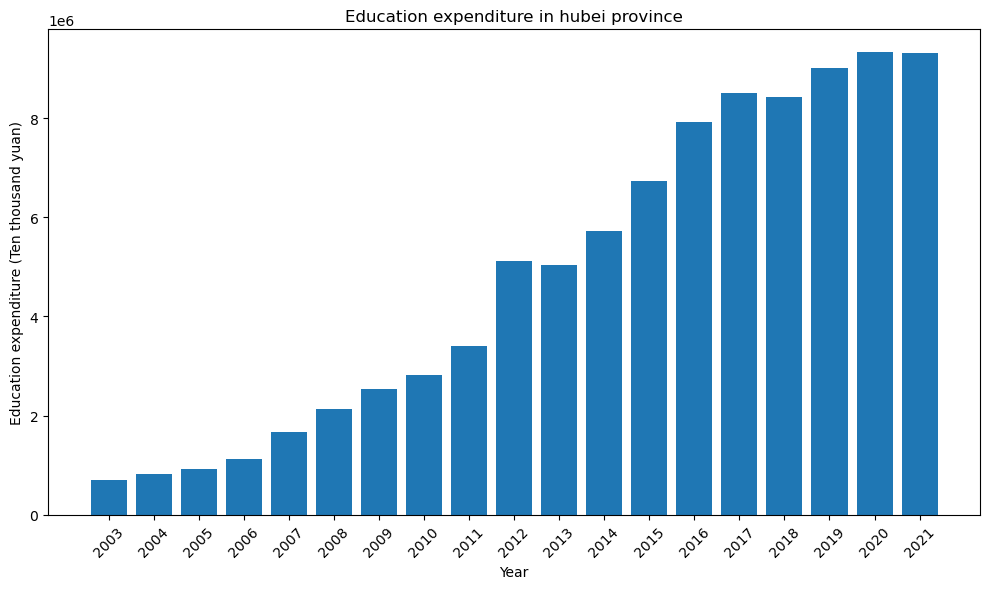

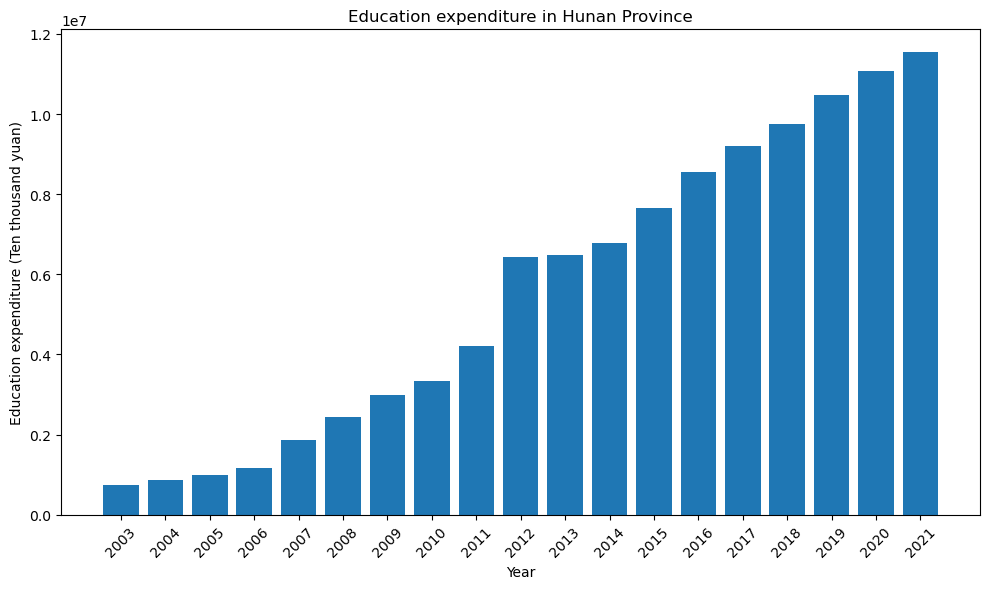

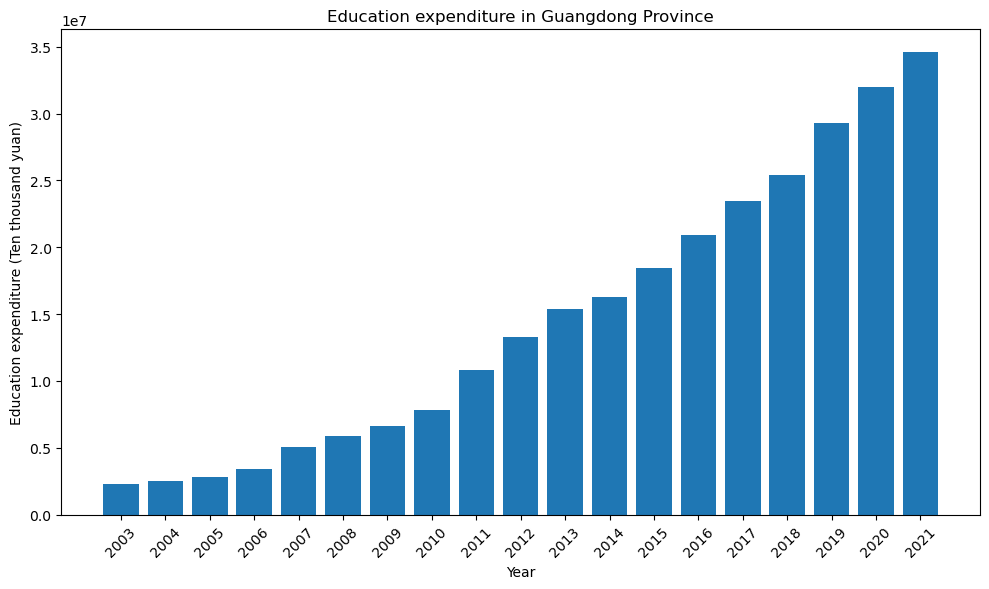

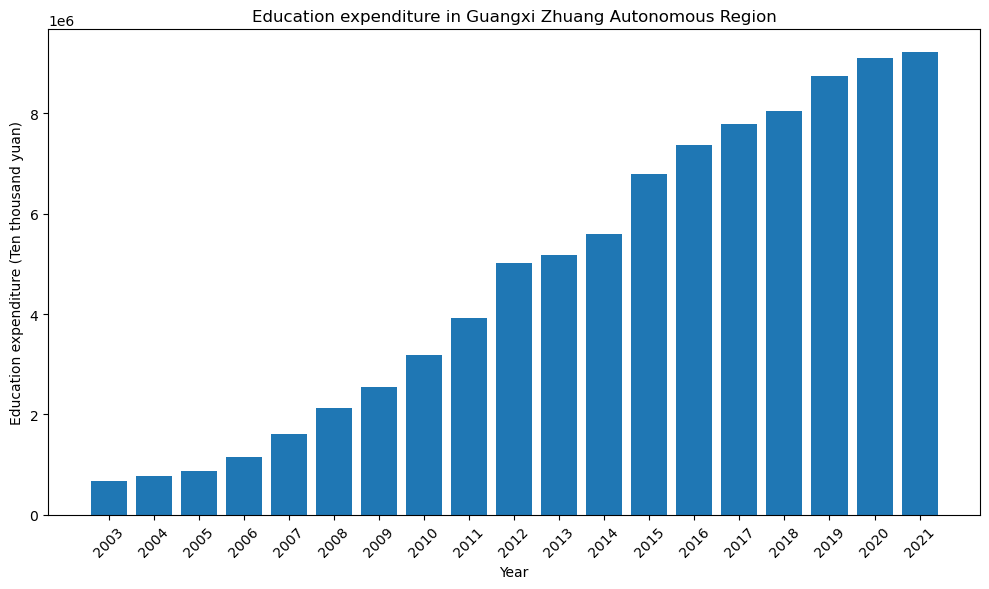

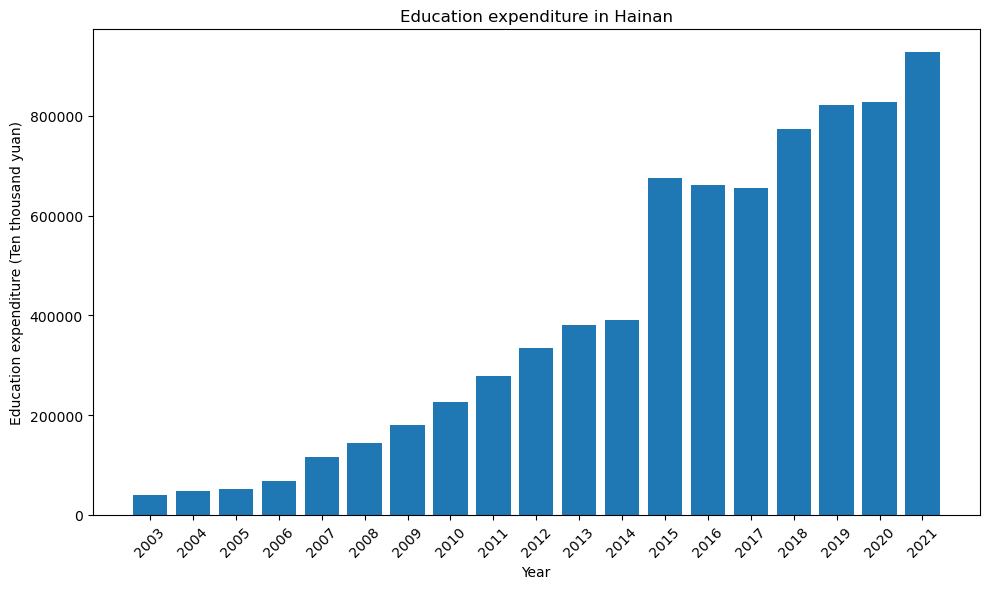

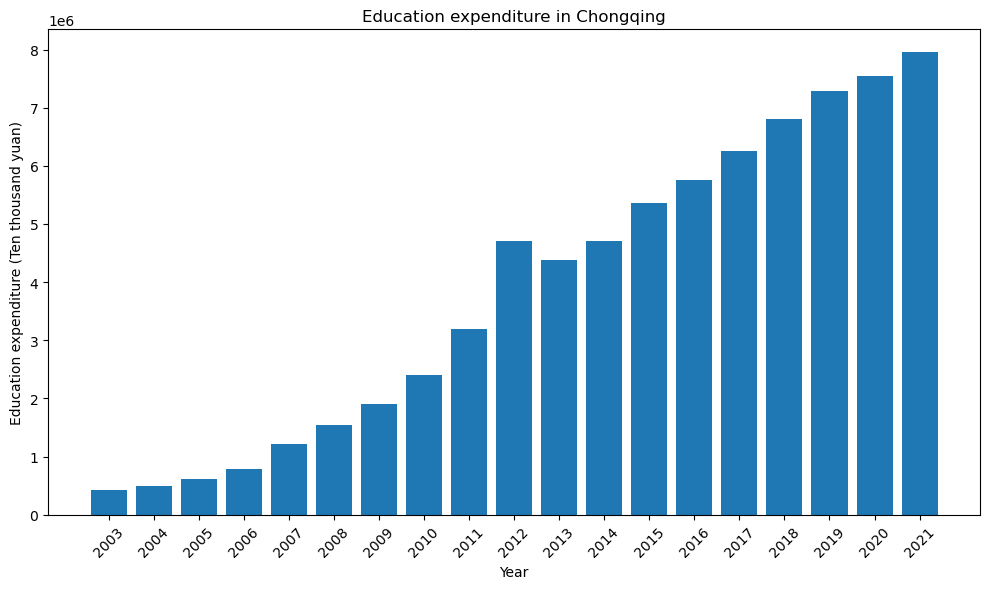

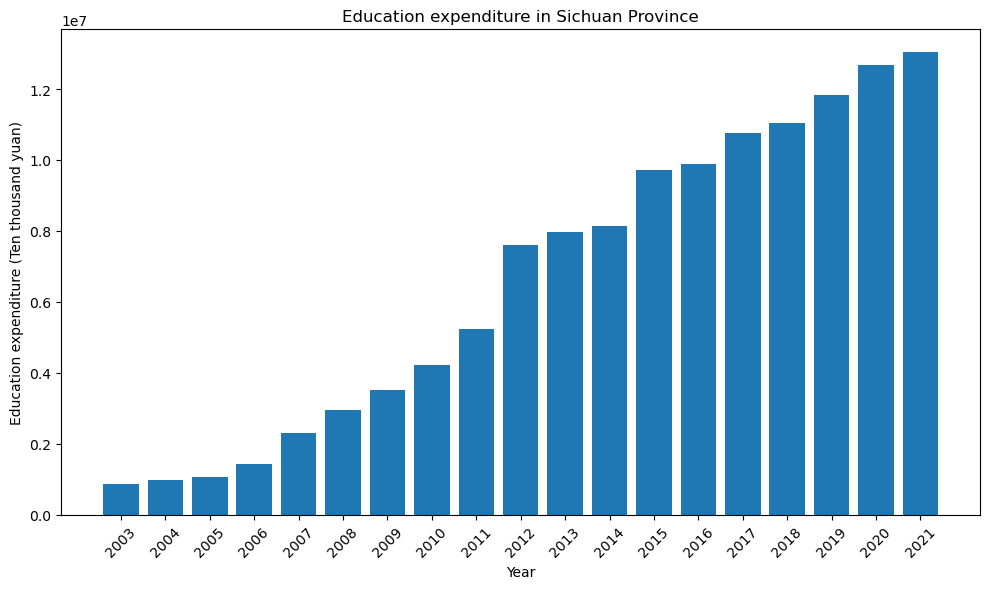

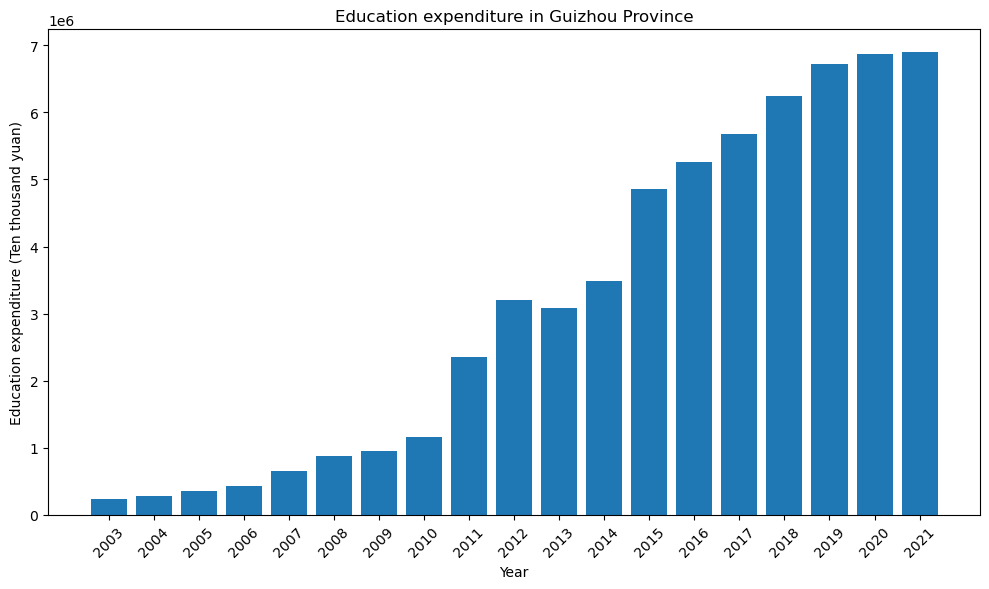

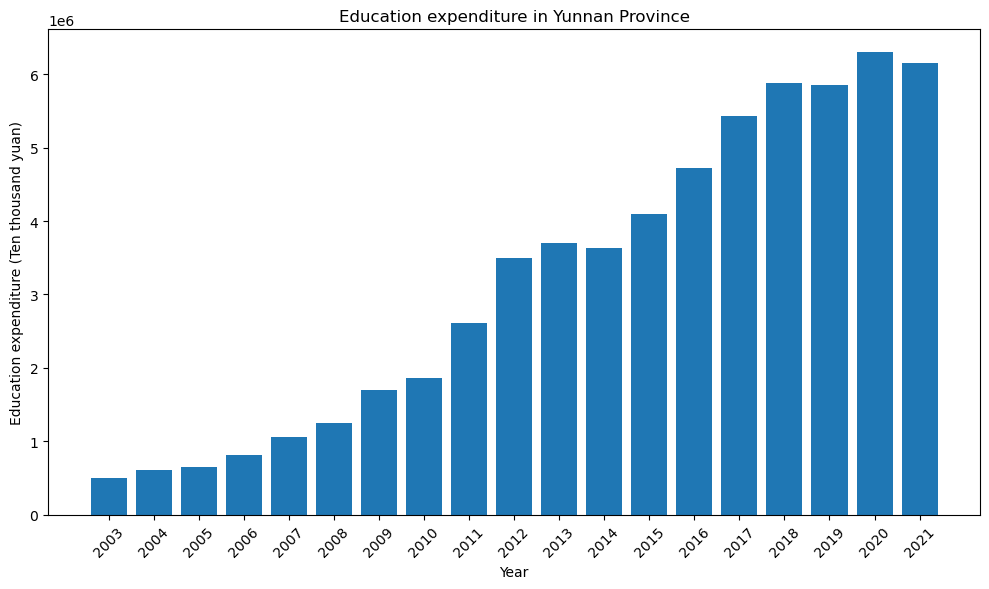

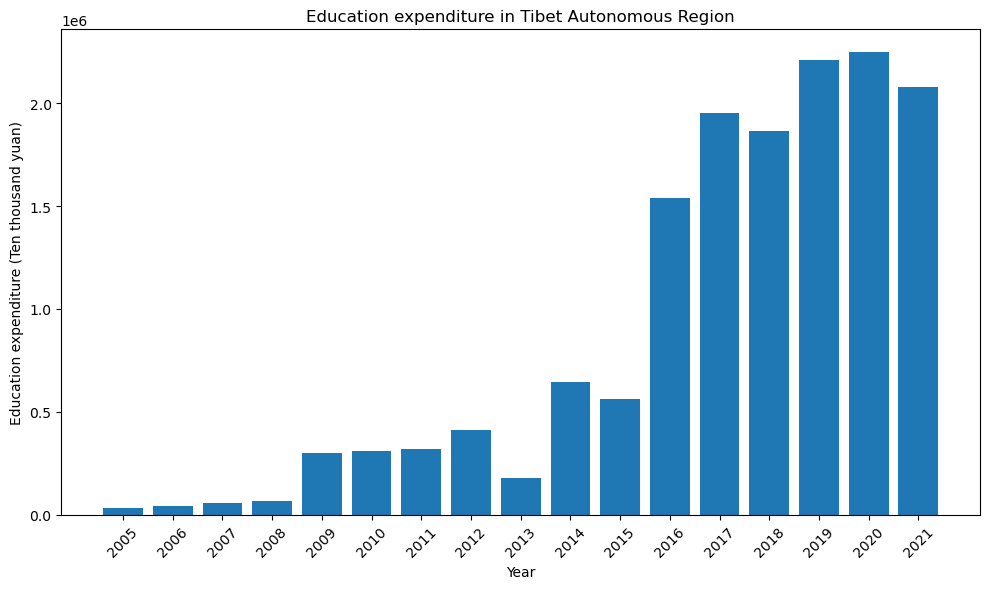

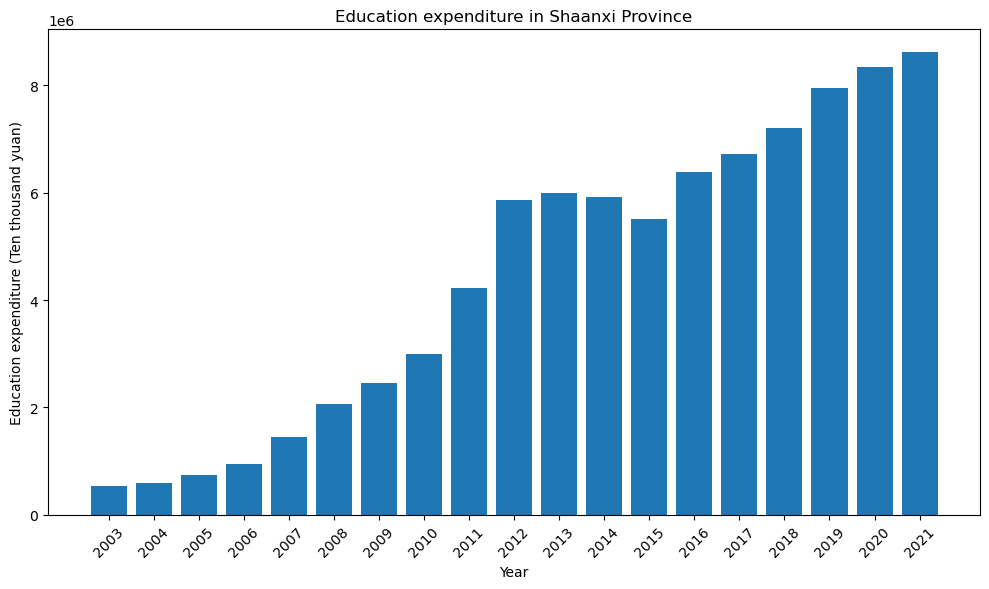

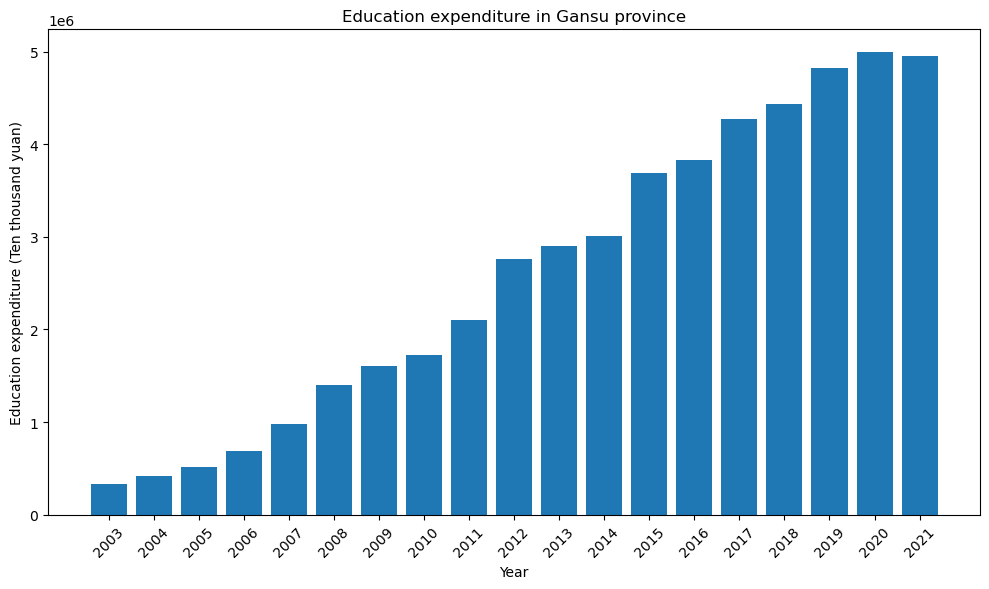

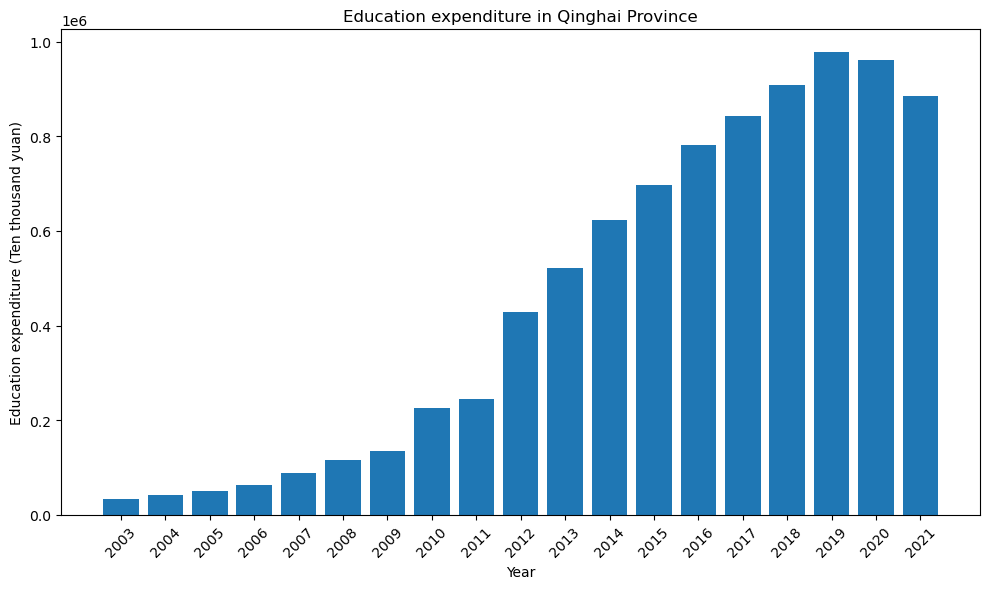

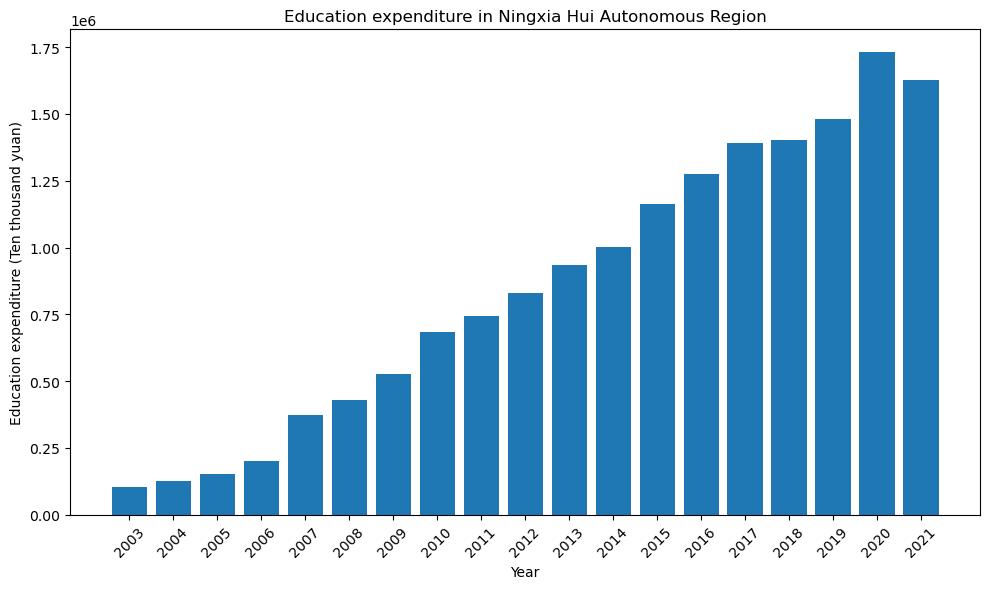

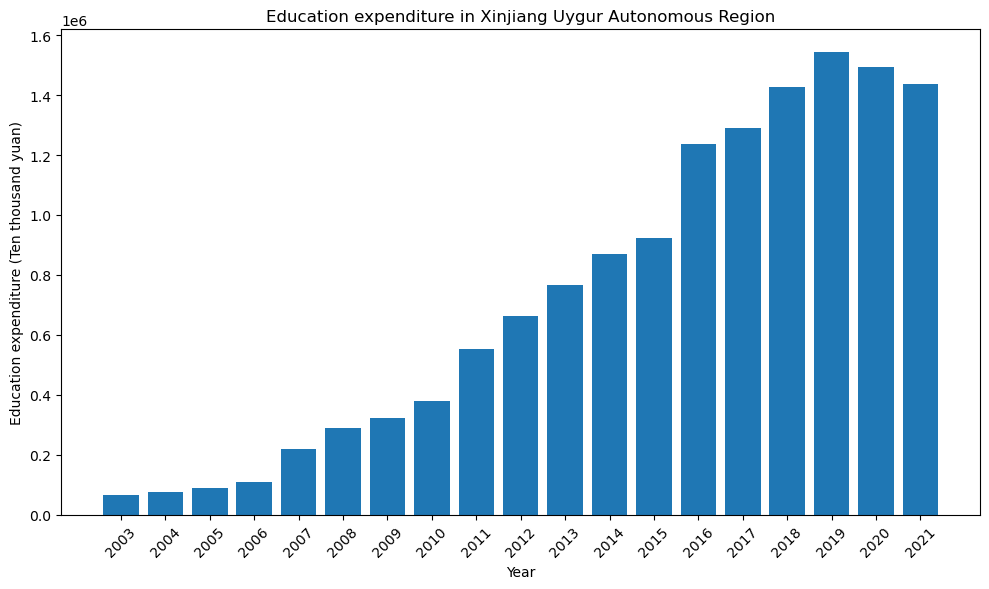

In [13]:
# Get the list of unique provinces
provinces = education_df['province'].unique()
# Retrieve the unique values from the 'province' column in the education DataFrame

# Generate a bar chart for each province
for province in provinces:
    # Filter the data for the current province
    province_data = education_df[education_df['province'] == province]
    # Select rows where 'province' matches the current province

    # Group the data by year and sum the education expenditures
    province_yearly_data = province_data.groupby('year')['Education expenditure_Ten thousand yuan_Citywide'].sum()
    # Group the data by 'year' and calculate the sum of 'Education expenditure_Ten thousand yuan_Citywide'

    # Create a bar chart
    plt.figure(figsize=(10, 6))  # Set the figure size
    plt.bar(province_yearly_data.index, province_yearly_data.values)  # Create a bar chart with years on the x-axis and expenditure on the y-axis
    plt.xlabel('Year')  # Set the label for the x-axis
    plt.ylabel('Education expenditure (Ten thousand yuan)')  # Set the label for the y-axis
    plt.title(f'Education expenditure in {province}')  # Set the title of the chart
    plt.xticks(province_yearly_data.index, rotation=45)  # Rotate the x-axis labels for better readability
    plt.tight_layout()  # Adjust the layout to fit everything nicely
    plt.show()  # Display the chart


Since the science table lacks a Province column, we will use the education table to aggregate the cities in each province and filter them into the science table. This way, we can obtain all the cities within a single province. With these data, we can perform budget expenditure analysis for individual cities within a single province for a specific year. For example, in the chart below, I created a composite bar chart showing the education and science expenditures of various cities in Jiangsu Province in 2020, represented by two different colors. This allows us to more intuitively see the comparison of education and science expenditures for each city, as well as the expenditure comparison between different cities.



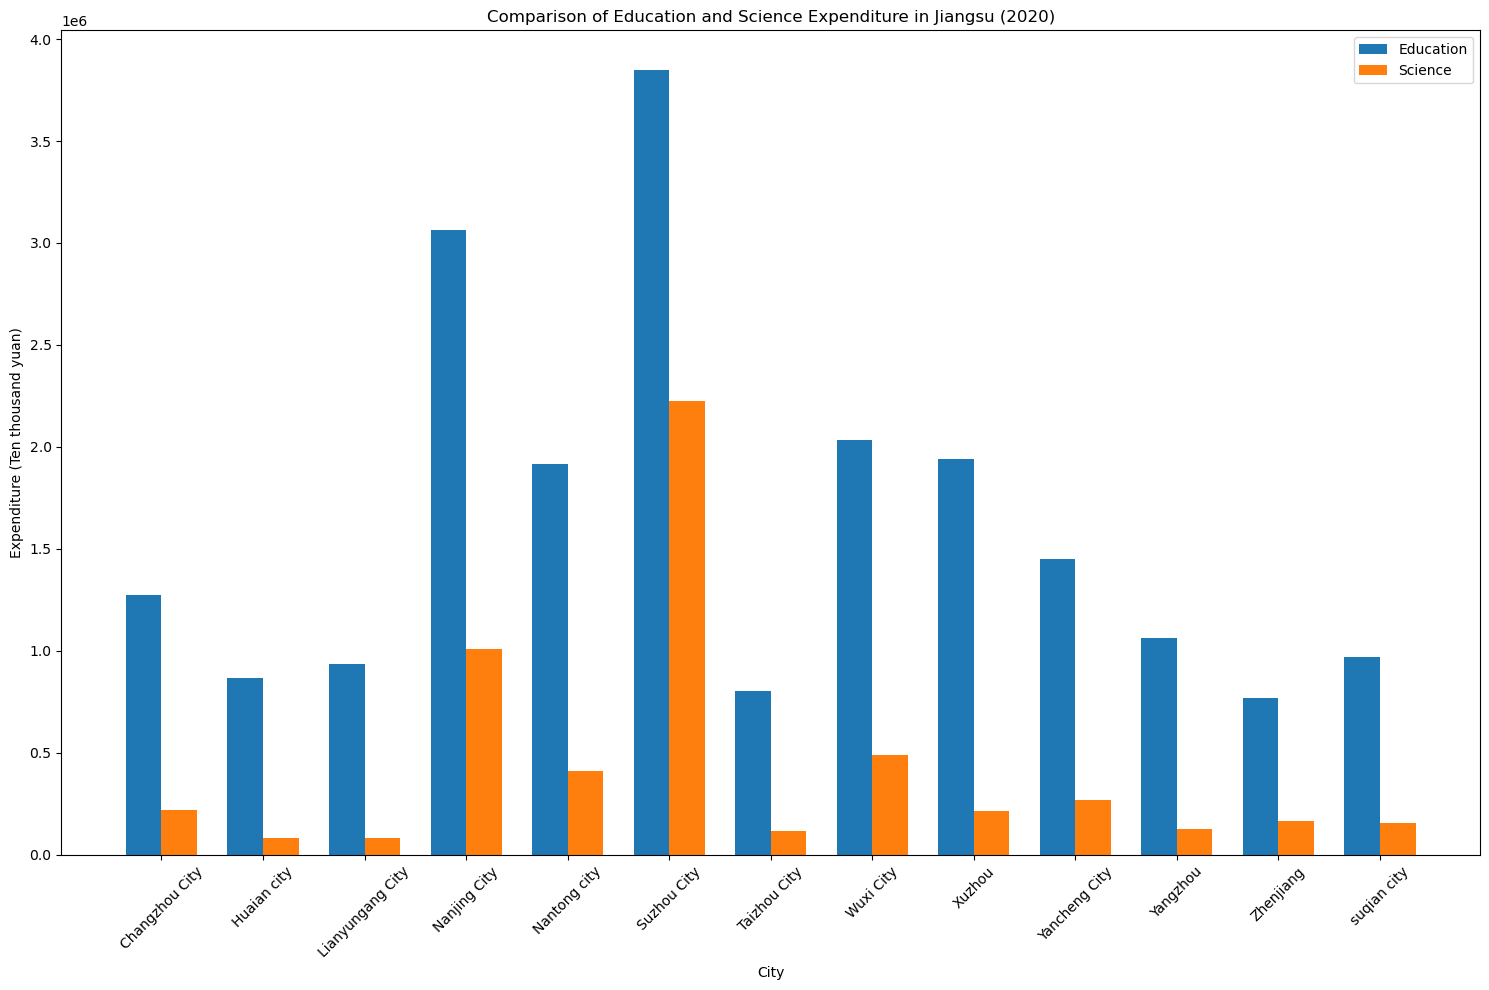

In [24]:
# Filter data for the year 2020
education_2020 = education_df[education_df['year'] == 2020]  # Select rows where 'year' is 2020 in education DataFrame
science_2020 = science_df[science_df['year'] == 2020]  # Select rows where 'year' is 2020 in science DataFrame

# Filter data for Jiangsu Province
jiangsu_education_2020 = education_2020[education_2020['province'] == 'Jiangsu Province']  # Select rows where 'province' is 'Jiangsu Province' in 2020 education data
jiangsu_science_2020 = science_2020[science_2020['prefecture-level city'].isin(jiangsu_education_2020['prefecture-level city'])]  
# Select rows in 2020 science data where 'prefecture-level city' is in the list of cities in Jiangsu education data

# Group by city and calculate the sum
education_sum = jiangsu_education_2020.groupby('prefecture-level city')['Education expenditure_Ten thousand yuan_Citywide'].sum()
# Group by 'prefecture-level city' and sum 'Education expenditure_Ten thousand yuan_Citywide' for Jiangsu education data in 2020
science_sum = jiangsu_science_2020.groupby('prefecture-level city')['science and technology expenditure_Ten thousand yuan_Citywide'].sum()
# Group by 'prefecture-level city' and sum 'science and technology expenditure_Ten thousand yuan_Citywide' for Jiangsu science data in 2020

# Create a new DataFrame with education and science expenditure data
comparison_df = pd.DataFrame({
    'Education': education_sum,  # Add education expenditure sums
    'Science': science_sum  # Add science expenditure sums
}).reset_index()  # Reset index to make 'prefecture-level city' a column

# Set the figure size for the plot
plt.figure(figsize=(15, 10))  # Set the size of the figure

# Set the width of the bars
bar_width = 0.35  # Define the width of the bars

# Set the number of cities
index = np.arange(len(comparison_df))  # Create an array with the number of cities

# Plot the bar chart for education expenditure
plt.bar(index, comparison_df['Education'], bar_width, label='Education')  # Plot bars for education expenditure

# Plot the bar chart for science expenditure, with an offset position
plt.bar(index + bar_width, comparison_df['Science'], bar_width, label='Science')  # Plot bars for science expenditure with an offset

# Add chart title and labels
plt.xlabel('City')  # Set the label for the x-axis
plt.ylabel('Expenditure (Ten thousand yuan)')  # Set the label for the y-axis
plt.title('Comparison of Education and Science Expenditure in Jiangsu (2020)')  # Set the title of the chart
plt.xticks(index + bar_width / 2, comparison_df['prefecture-level city'], rotation=45)  # Set the x-ticks and rotate them for readability
plt.legend()  # Add a legend to the chart

# Show the chart
plt.tight_layout()  # Adjust the layout to fit everything nicely
plt.show()  # Display the chart


Next, we will continue with Jiangsu Province as an example to conduct a more complex visualization analysis. Using data from both tables, we will analyze the annual education and science expenditures for each city in Jiangsu Province over time. By utilizing line charts, we can clearly express the trends of each expenditure. Additionally, we will differentiate each city with different colors, allowing for a vertical comparison of expenditure differences between the cities.

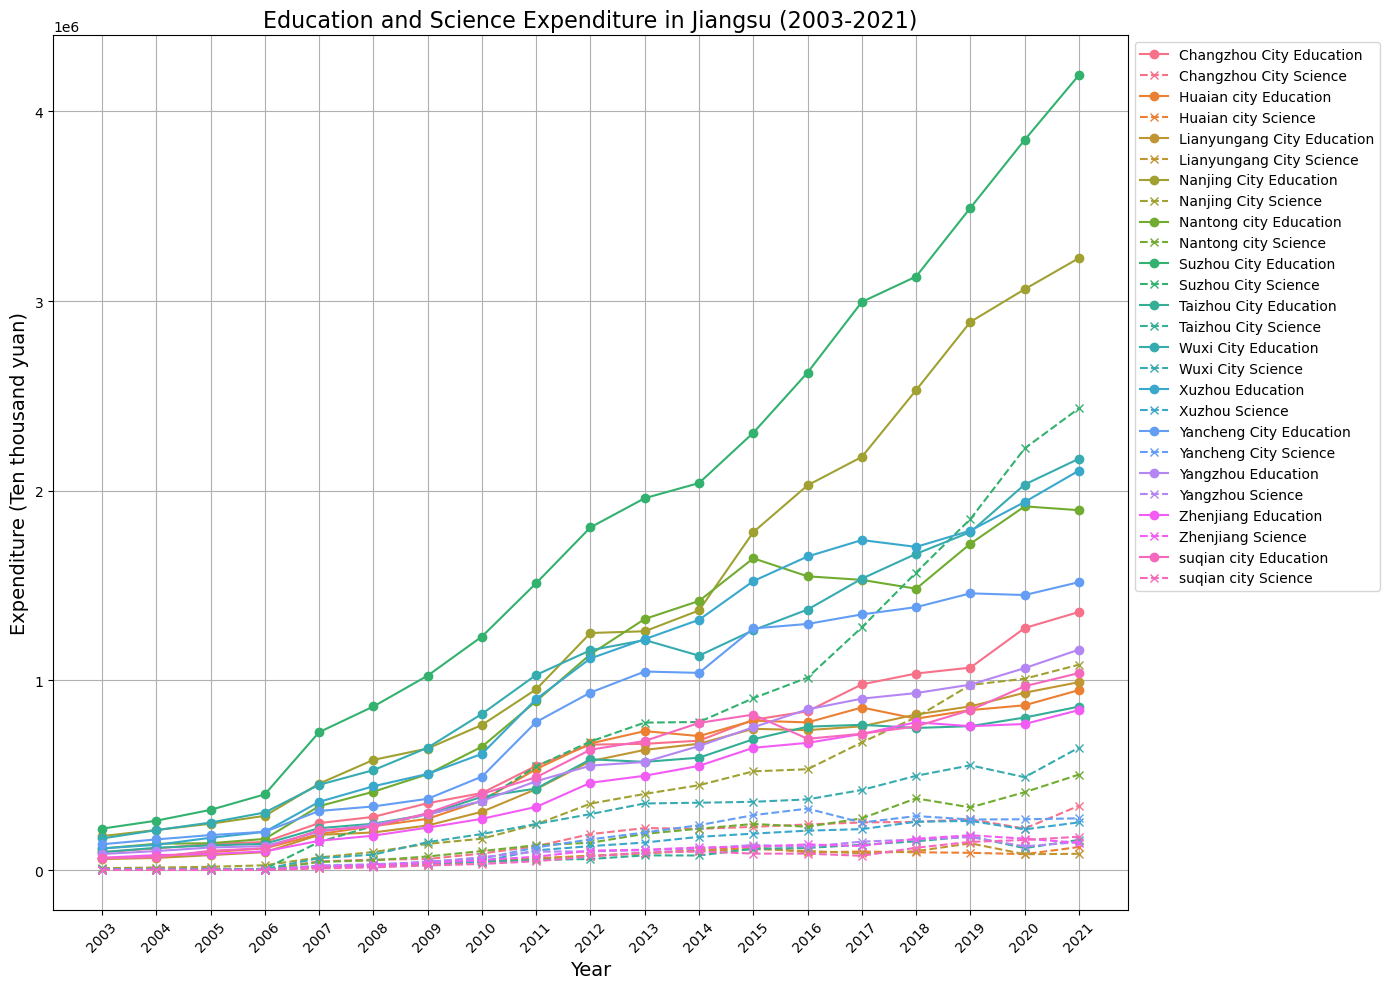

In [27]:
# Set the color palette for Seaborn
palette = sns.color_palette("husl", n_colors=len(education_sum.columns))
# Set a color palette using the 'husl' scheme with a number of colors equal to the number of columns in education_sum

# Filter data for Jiangsu Province
jiangsu_education = education_df[education_df['province'] == 'Jiangsu Province']
# Select rows where 'province' is 'Jiangsu Province' in the education DataFrame
jiangsu_science = science_df[science_df['prefecture-level city'].isin(jiangsu_education['prefecture-level city'])]
# Select rows in the science DataFrame where 'prefecture-level city' is in the list of cities in Jiangsu education data

# Group by year and prefecture-level city, and sum the education and science expenditures
education_sum = jiangsu_education.groupby(['year', 'prefecture-level city'])['Education expenditure_Ten thousand yuan_Citywide'].sum().unstack()
# Group by 'year' and 'prefecture-level city' and calculate the sum of 'Education expenditure_Ten thousand yuan_Citywide', then unstack the DataFrame
science_sum = jiangsu_science.groupby(['year', 'prefecture-level city'])['science and technology expenditure_Ten thousand yuan_Citywide'].sum().unstack()
# Group by 'year' and 'prefecture-level city' and calculate the sum of 'science and technology expenditure_Ten thousand yuan_Citywide', then unstack the DataFrame

# Plot line charts
plt.figure(figsize=(14, 10))  # Set the figure size for the plot

for i, city in enumerate(education_sum.columns):
    color = palette[i]  # Get the color for the current city from the palette
    plt.plot(education_sum.index, education_sum[city], label=f'{city} Education', linestyle='-', marker='o', color=color)
    # Plot the education expenditure for the current city with a solid line and circle markers
    plt.plot(science_sum.index, science_sum[city], label=f'{city} Science', linestyle='--', marker='x', color=color)
    # Plot the science expenditure for the current city with a dashed line and x markers

# Set chart title and labels
plt.title('Education and Science Expenditure in Jiangsu (2003-2021)', fontsize=16)  # Set the title of the chart
plt.xlabel('Year', fontsize=14)  # Set the label for the x-axis
plt.ylabel('Expenditure (Ten thousand yuan)', fontsize=14)  # Set the label for the y-axis
plt.xticks(education_sum.index, rotation=45)  # Set the x-ticks and rotate them for readability
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), fontsize=10)  # Add a legend outside the plot
plt.grid(True)  # Enable the grid
plt.tight_layout()  # Adjust the layout to fit everything nicely

# Show the chart
plt.show()  # Display the chart


Similarly, to observe data trends, we can downplay the concept of "prefecture-level cities" and focus on the time scale. Below, I used a complex scatter plot to analyze three types of data simultaneously. Here, we can see that with a limited total budget, some prefecture-level cities tend to invest funds in either education or science alone, while the more mainstream option is to proportionally increase investment in both areas. The color variations allow us to intuitively see the development of these prefecture-level cities over time.

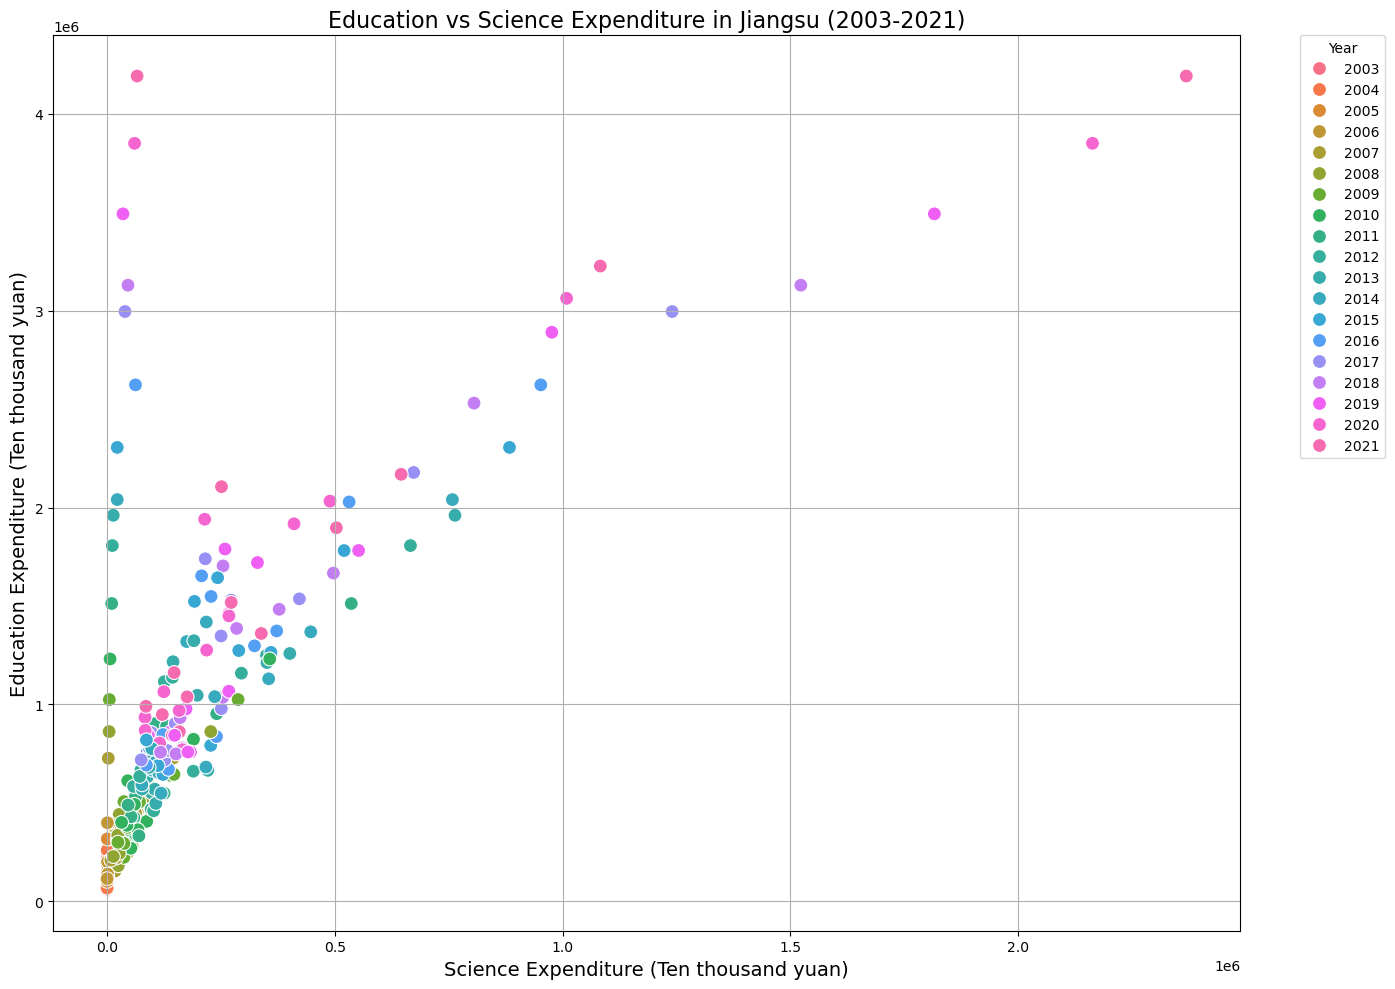

In [29]:
# Filter data for Jiangsu Province
jiangsu_education = education_df[education_df['province'] == 'Jiangsu Province']
# Select rows where 'province' is 'Jiangsu Province' in the education DataFrame
jiangsu_science = science_df[science_df['prefecture-level city'].isin(jiangsu_education['prefecture-level city'])]
# Select rows in the science DataFrame where 'prefecture-level city' is in the list of cities in Jiangsu education data

# Merge education expenditure and science expenditure data
merged_df = pd.merge(
    jiangsu_education[['year', 'prefecture-level city', 'Education expenditure_Ten thousand yuan_Citywide']],
    jiangsu_science[['year', 'prefecture-level city', 'science and technology expenditure_Ten thousand yuan_Citywide']],
    on=['year', 'prefecture-level city']
)
# Merge the education and science DataFrames on 'year' and 'prefecture-level city' columns

# Set the figure size and color palette
plt.figure(figsize=(14, 10))  # Set the size of the figure
palette = sns.color_palette("husl", n_colors=len(merged_df['year'].unique()))
# Set a color palette using the 'husl' scheme with a number of colors equal to the number of unique years

# Plot the scatter plot
sns.scatterplot(
    x='science and technology expenditure_Ten thousand yuan_Citywide',
    y='Education expenditure_Ten thousand yuan_Citywide',
    hue='year',
    data=merged_df,
    palette=palette,
    legend='full',
    s=100  # Set the size of the points
)

# Set chart title and labels
plt.title('Education vs Science Expenditure in Jiangsu (2003-2021)', fontsize=16)  # Set the title of the chart
plt.xlabel('Science Expenditure (Ten thousand yuan)', fontsize=14)  # Set the label for the x-axis
plt.ylabel('Education Expenditure (Ten thousand yuan)', fontsize=14)  # Set the label for the y-axis
plt.legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)  # Add a legend outside the plot
plt.grid(True)  # Enable the grid
plt.tight_layout()  # Adjust the layout to fit everything nicely

# Show the chart
plt.show()  # Display the chart


## Map Data Visualization

Since the data for this study comes from the statistical yearbooks of various provinces in China, it is natural to place the data on a map of China to see this series of comparisons more intuitively. Below is the shp file of China's provincial administrative divisions (loading files at the prefecture-level is more complex, and matching the IDs with the table data is a major task). I spent some time processing the attributes of the shp file to make it match our table data.

Let's simply read and display this shp file. Here, we use the geopandas library.

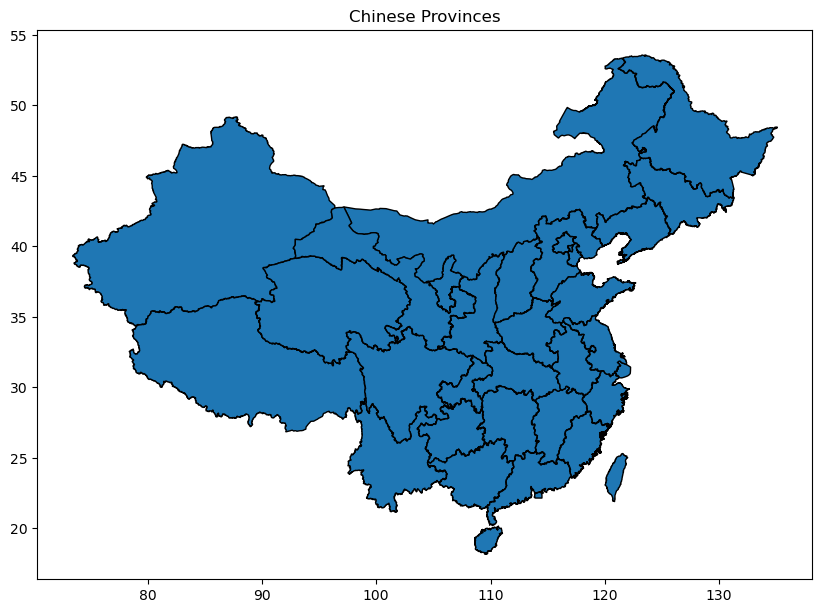

In [16]:
# Read the shapefile
shp_path = 'Chinese_Province_shp/省界_region.shp'  # Path to the shapefile
gdf = gpd.read_file(shp_path)  # Read the shapefile into a GeoDataFrame using geopandas

# Visualize the shapefile
fig, ax = plt.subplots(figsize=(10, 10))  # Create a figure and an axis with specified size
gdf.plot(ax=ax, edgecolor='black')  # Plot the GeoDataFrame, setting the edge color of the shapes to black

# Add title
ax.set_title('Chinese Provinces')  # Set the title of the plot

# Show the plot
plt.show()  # Display the plot


Next, we can perform a series of visualizations on this map. Below is one example: I read the total education expenditures of each province in 2021 and displayed them using a color gradient from light to dark. This allows us to more intuitively see the distribution of expenditures.

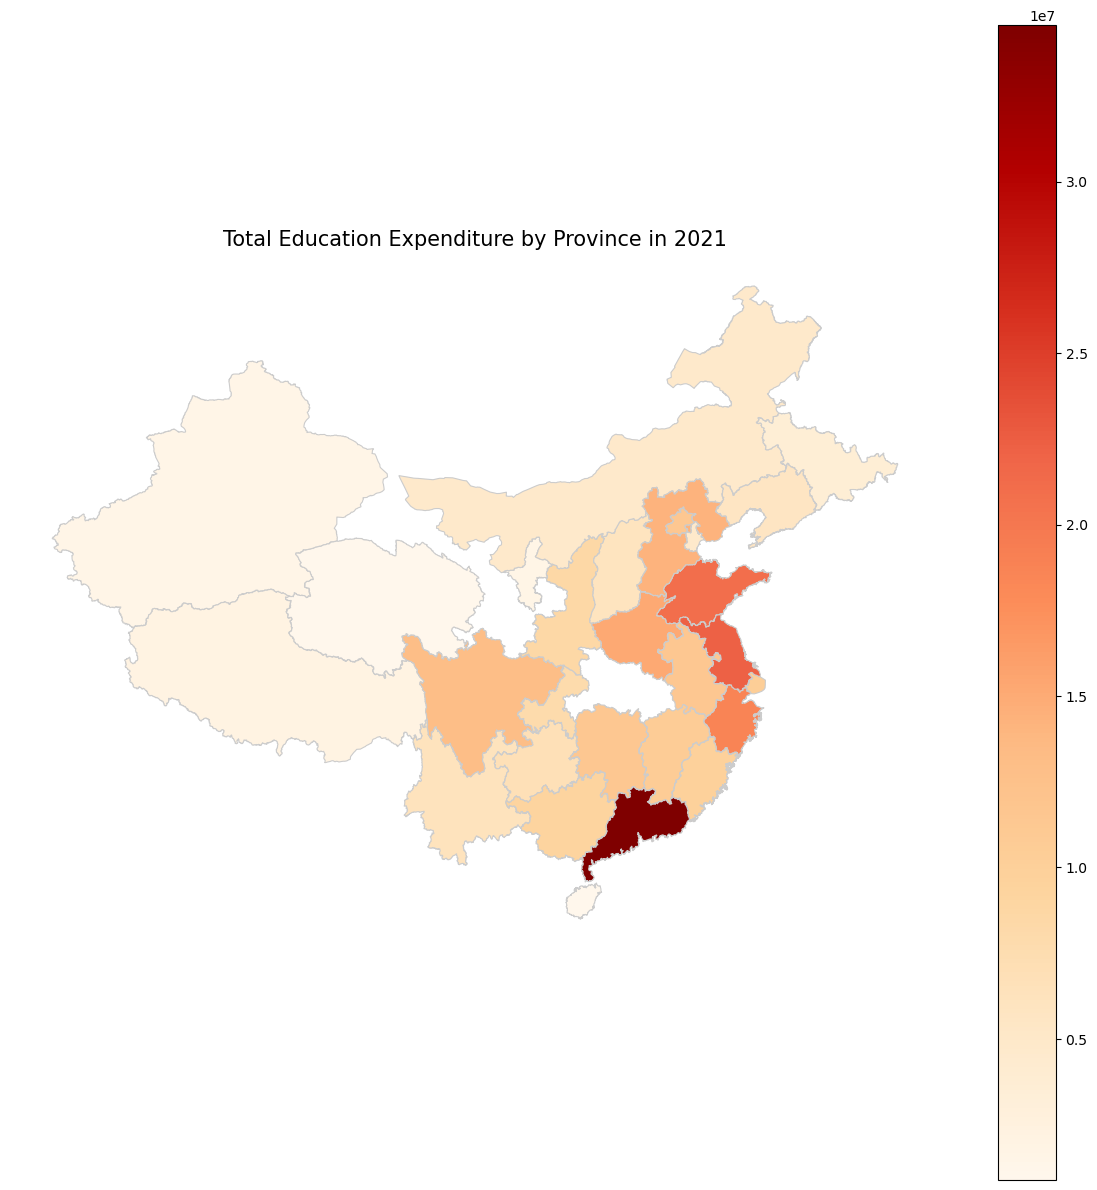

In [17]:
# Calculate the total education expenditure for each province in 2021
education_2021 = education_df[education_df['year'] == 2021]  # Filter the education DataFrame for the year 2021
education_2021_sum = education_2021.groupby('province')['Education expenditure_Ten thousand yuan_Citywide'].sum().reset_index()
# Group by 'province' and sum the 'Education expenditure_Ten thousand yuan_Citywide', then reset the index

# Merge the data, adding total education expenditure to the geographic data
gdf = gdf.merge(education_2021_sum, left_on='ID', right_on='province')
# Merge the GeoDataFrame with the education expenditure data on the 'ID' and 'province' columns

# Visualize the map, using gradient colors to represent education expenditure
fig, ax = plt.subplots(figsize=(15, 15))  # Create a figure and an axis with specified size
gdf.plot(column='Education expenditure_Ten thousand yuan_Citywide', 
         cmap='OrRd', 
         linewidth=0.8, 
         edgecolor='0.8', 
         legend=True, 
         ax=ax)
# Plot the GeoDataFrame with 'Education expenditure_Ten thousand yuan_Citywide' as the column for color mapping,
# using the 'OrRd' colormap, setting the line width and edge color, and adding a legend

# Add title
ax.set_title('Total Education Expenditure by Province in 2021', fontdict={'fontsize': '15', 'fontweight' : '3'})
# Set the title of the plot with specified font size and weight

# Hide the axes
ax.set_axis_off()  # Hide the axis

# Show the plot
plt.show()  # Display the plot


Here, to simplify the chart relationships, we will add a province column to the science table.

In [38]:
# Merge data based on common columns, adding province information to science_df
science_df = science_df.merge(
    education_df[['prefecture-level city', 'year', 'province']],  # Select columns to merge from education_df
    on=['prefecture-level city', 'year'],  # Merge on 'prefecture-level city' and 'year' columns
    how='left'  # Use a left join to keep all rows from science_df and add matching rows from education_df
)

# Display the first few rows of the merged science_df to confirm the result
science_df.head()  # Show the first few rows of the updated science_df


MergeError: Passing 'suffixes' which cause duplicate columns {'province_x'} is not allowed.

Here, my idea is to use the Geopandas library to create a polygon (circle) above each province, using its size to represent the amount of data. This way, we can simultaneously display the education and science expenditures of each province in 2021. However, the code has encountered some errors. I couldn't identify the issue, which could be due to an overall problem with the approach or possibly due to updates in the libraries that differ from what I learned a few years ago.

KeyError: 'Education expenditure_Ten thousand yuan_Citywide_edu'

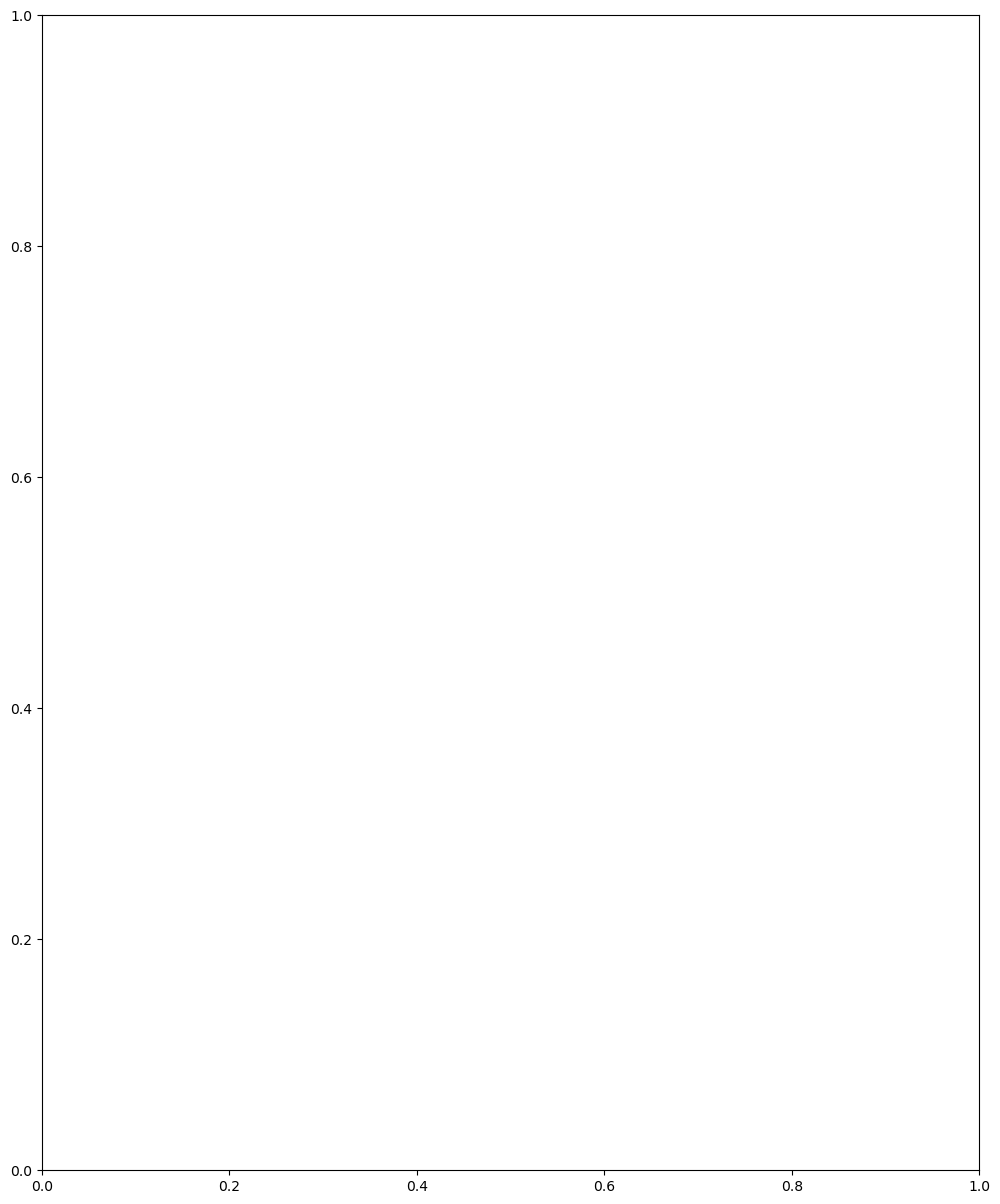

In [39]:
# Read the shapefile
shp_path = 'Chinese_Province_shp/省界_region.shp'  # Path to the shapefile
gdf = gpd.read_file(shp_path)  # Read the shapefile into a GeoDataFrame using geopandas

# Calculate the total education and science expenditure for each province in 2021
education_2021 = education_df[education_df['year'] == 2021]  # Filter the education DataFrame for the year 2021
science_2021 = science_df[science_df['year'] == 2021]  # Filter the science DataFrame for the year 2021

education_2021_sum = education_2021.groupby('province')['Education expenditure_Ten thousand yuan_Citywide'].sum().reset_index()
# Group by 'province' and sum the 'Education expenditure_Ten thousand yuan_Citywide', then reset the index
science_2021_sum = science_2021.groupby('province')['science and technology expenditure_Ten thousand yuan_Citywide'].sum().reset_index()
# Group by 'province' and sum the 'science and technology expenditure_Ten thousand yuan_Citywide', then reset the index

# Merge the data, adding total education and science expenditure to the geographic data
gdf = gdf.merge(education_2021_sum, left_on='ID', right_on='province')  # Merge education expenditure data
gdf = gdf.merge(science_2021_sum, left_on='ID', right_on='province', suffixes=('_edu', '_sci'))  # Merge science expenditure data with suffixes

# Visualize the map
fig, ax = plt.subplots(figsize=(15, 15))  # Create a figure and an axis with specified size
gdf.plot(column='Education expenditure_Ten thousand yuan_Citywide_edu', cmap='OrRd', linewidth=0.8, edgecolor='0.8', ax=ax)
# Plot the GeoDataFrame with 'Education expenditure_Ten thousand yuan_Citywide_edu' as the column for color mapping,
# using the 'OrRd' colormap, setting the line width and edge color

# Add title
ax.set_title('Total Education and Science Expenditure by Province in 2021', fontdict={'fontsize': '15', 'fontweight': '3'})
# Set the title of the plot with specified font size and weight

# Add circles on the map
for x, y, edu, sci in zip(gdf.geometry.centroid.x, gdf.geometry.centroid.y, gdf['Education expenditure_Ten thousand yuan_Citywide_edu'], gdf['science and technology expenditure_Ten thousand yuan_Citywide_sci']):
    edu_size = edu / 1e4  # Scale the education expenditure size to fit the plot
    sci_size = sci / 1e4  # Scale the science expenditure size to fit the plot
    ax.add_patch(plt.Circle((x, y), edu_size, color='red', alpha=0.2))  # Add red circles for education expenditure
    ax.add_patch(plt.Circle((x, y), sci_size, color='blue', alpha=0.2))  # Add blue circles for science expenditure

# Hide the axes
ax.set_axis_off()  # Hide the axis

# Show the plot
plt.show()  # Display the plot


## Conclusion

This study explored the temporal growth relationship of education and science expenditures in China over the past 20 years, as well as the spatial relationships across provinces and prefecture-level cities. We completed data visualization and analysis visualization. The study shows that during the period of rapid economic growth in China, there is a noticeable positive correlation trend between the growth of education expenditures and the growth of science expenditures. While the results vary in different regions, overall, both expenditures are in a phase of rapid growth.